In [1]:
import os
os.chdir("../")

overwrite = False
dataset_name = 'nicu'
attr_suffix = ''
suffix = '_brady2' 

# Data

In [2]:
with open('run/settings.py', 'r') as file:
    exec(file.read())
# with open('run/data.py', 'r') as file:
#     exec(file.read())
model_name = ''.join([dataset_name, attr_suffix, suffix]) 
exec(open('run/configs/nicu_brady2.py', 'r').read())
if attr_suffix == '':
    config_dict = update_config(config_dict, custom_target_cols = ['label'])
if 'open_vocab' in locals():
    config_dict = update_config(config_dict, open_vocab = open_vocab)
exec(open('run/prepare_datasets/nicu.py', 'r').read())
with open('run/inputs.py', 'r') as file:
    exec(file.read())

Random seed set to 333
using device:  cpu
nicu_brady2
nicu_brady2

Sample of patients with positive labels:
VitalID
1018    8
5170    8
1835    8
2361    8
2791    8
dtype: int64


Processing descriptions: 100%|██████████| 131/131 [00:30<00:00,  4.35it/s]


After downsampling:
description_ts_event_binary
No events.                      20000
Bradycardia events happened.     3610
Name: count, dtype: int64
train, test, left:  16527 4722 2361


final distribution of text prediction
description_ts_event_binary
No events.                      14000
Bradycardia events happened.     2527
Name: count, dtype: int64
description_ts_event_binary
No events.                      4000
Bradycardia events happened.     722
Name: count, dtype: int64
description_ts_event_binary
No events.                      2000
Bradycardia events happened.     361
Name: count, dtype: int64
text
No events.                      14000
Bradycardia events happened.     2527
Name: count, dtype: int64
text
No events.                      4000
Bradycardia events happened.     722
Name: count, dtype: int64
text
No events.                      2000
Bradycardia events happened.     361
Name: count, dtype: int64
nicu_brady2
standardization mean and std:  150.08409565492155 20.041058

# Model (customizable)

In [3]:
with open('run/model.py', 'r') as file:
    exec(file.read())

nicu_brady2
/Users/joyqiu/Documents/Documents JoyQiu Work/Research/LLMTimeSeries/llm_nicu_vitalsigns/script/VITAL/results/nicu_brady2
nicu_brady2
Layer (type:depth-idx)                                                 Param #
VITAL                                                                  --
├─TSEncoder: 1-1                                                       --
│    └─LocalNorm: 2-1                                                  --
│    └─PatchCNNTSEncoder: 2-2                                          --
│    │    └─ModuleList: 3-1                                            1,859,424
│    │    └─LayerNorm: 3-2                                             1,536
├─TextEncoder: 1-2                                                     --
│    └─PatchMLPTextEncoder: 2-3                                        --
│    │    └─ModuleList: 3-3                                            5,327,616
├─TSDecoder: 1-3                                                       --
│    └─SelfAttnDec

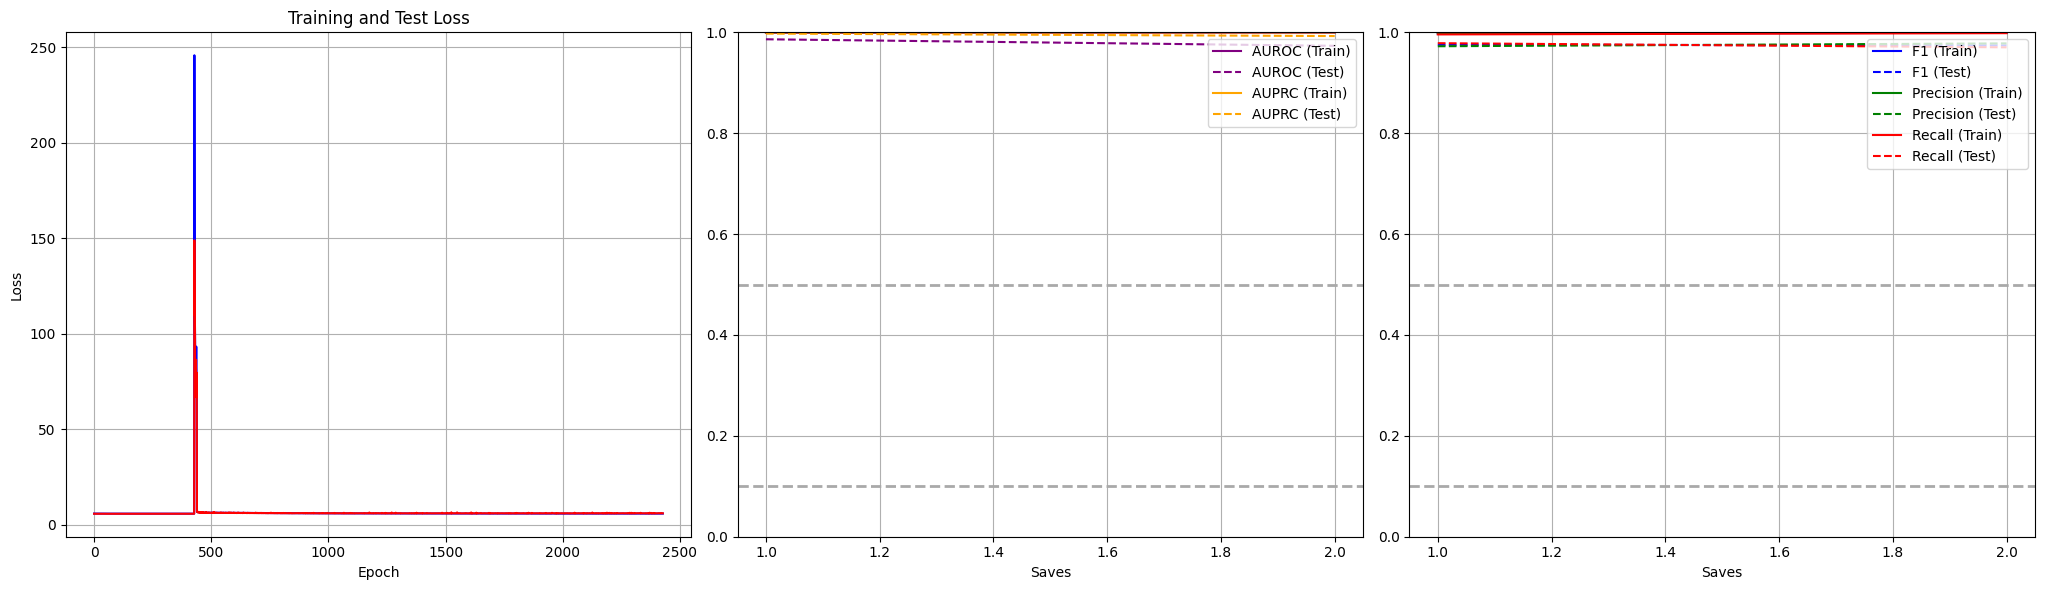

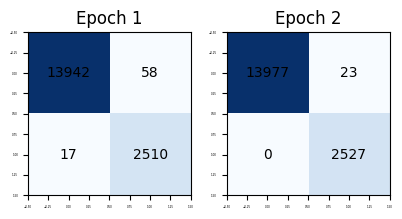

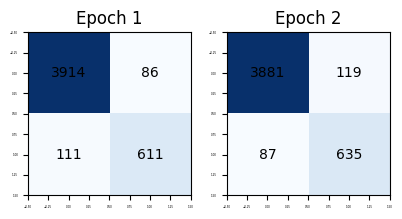

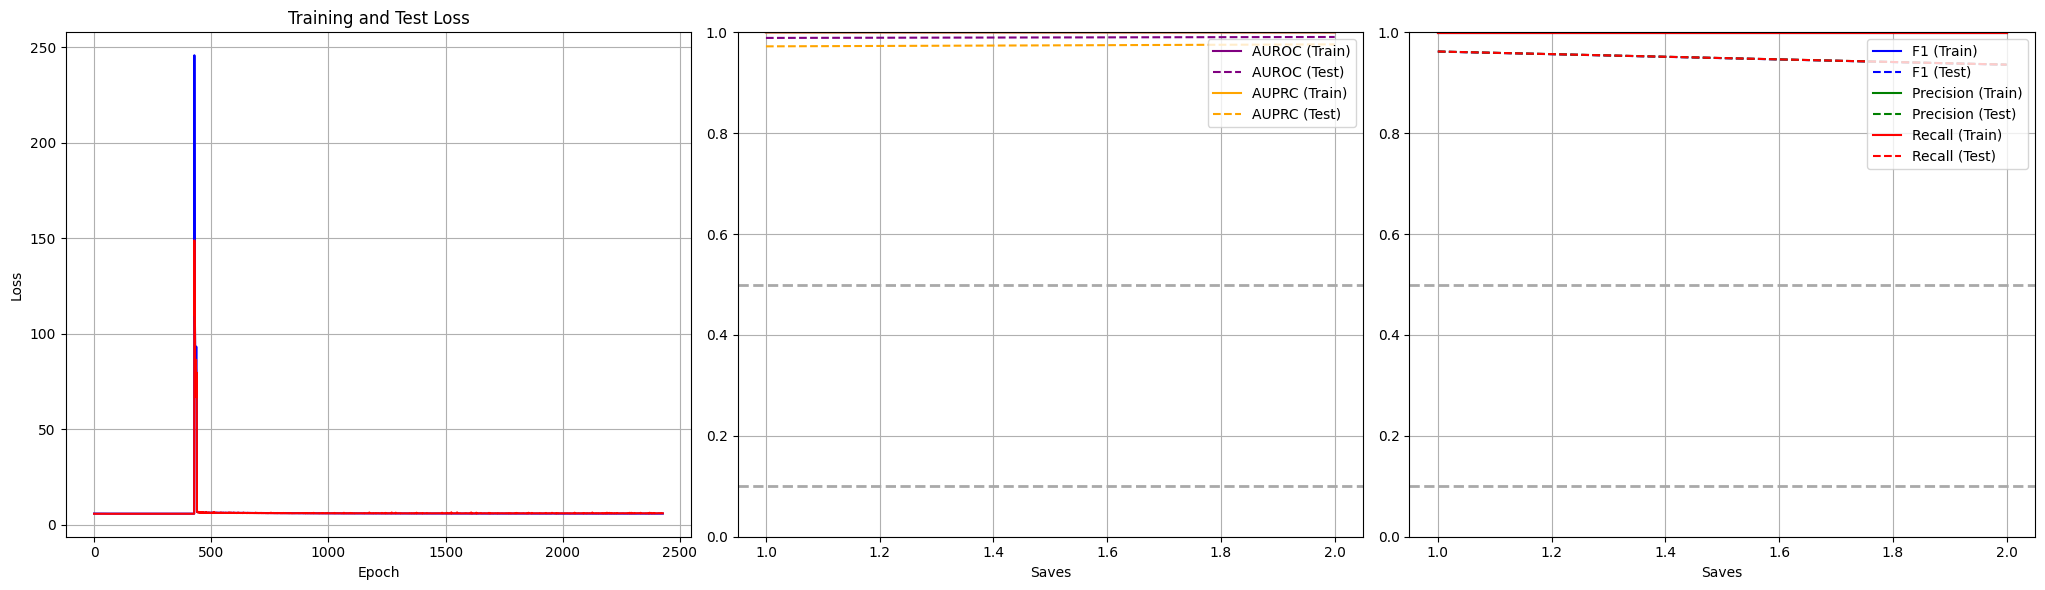

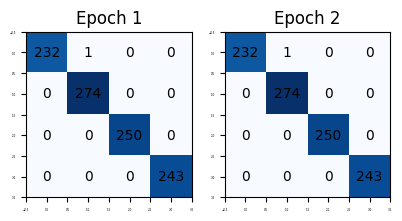

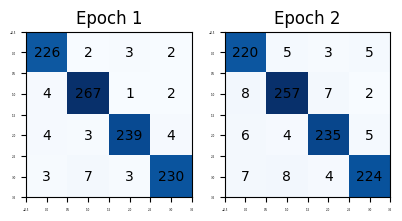

KeyboardInterrupt: 

In [4]:
with open('run/train_2steps.py', 'r') as file:
    exec(file.read())

# Generation

1    No events.
Name: description_ts_event_binary, dtype: object


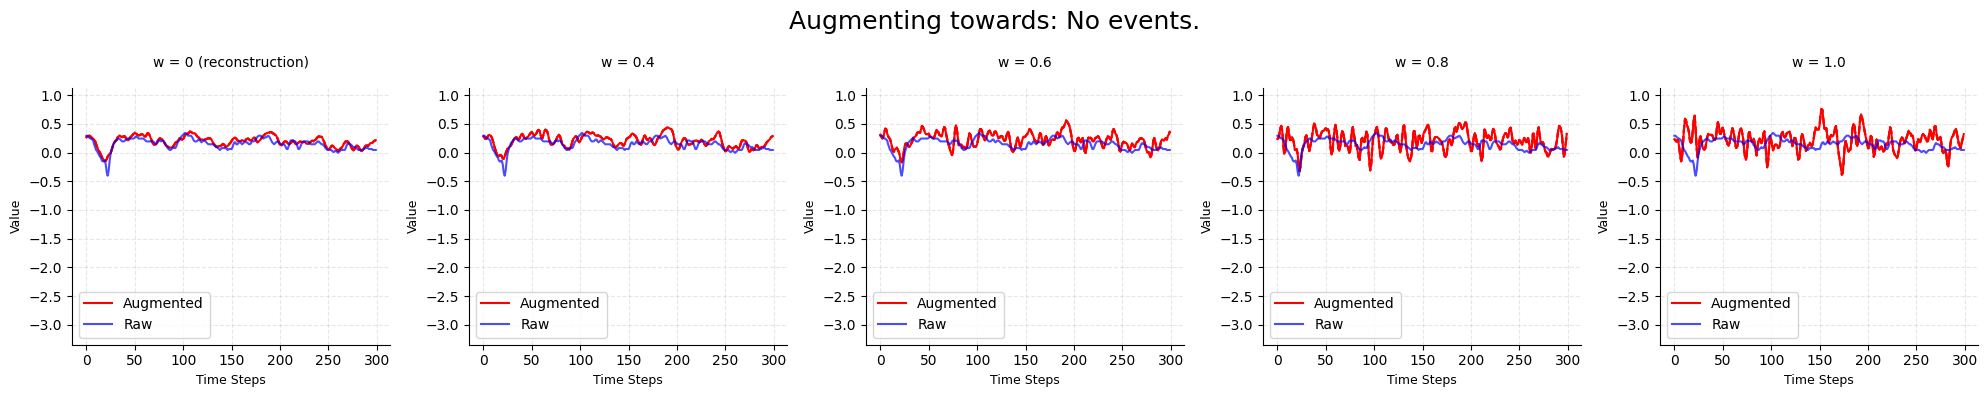

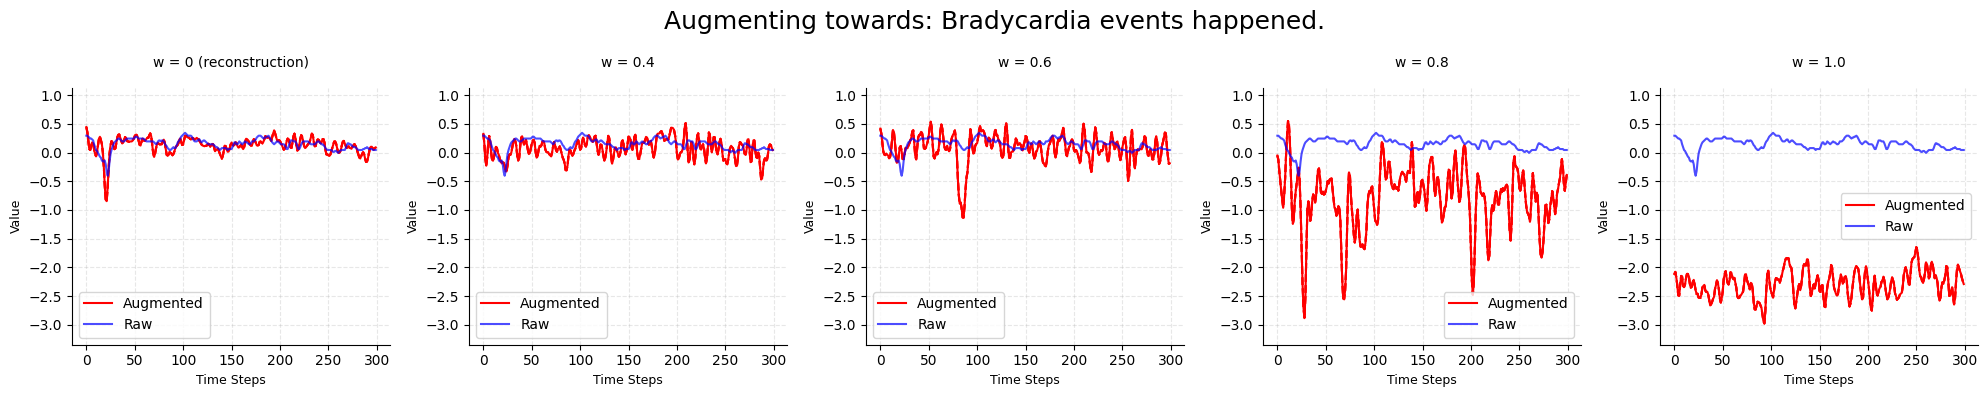

1    Bradycardia events happened.
Name: description_ts_event_binary, dtype: object


KeyboardInterrupt: 

In [5]:
tid=1
viz_generation_conditional(df_left, model, config_dict, tid=tid, sampling=True, b=1, ep=1)

0    No events.
Name: description_ts_event_binary, dtype: object


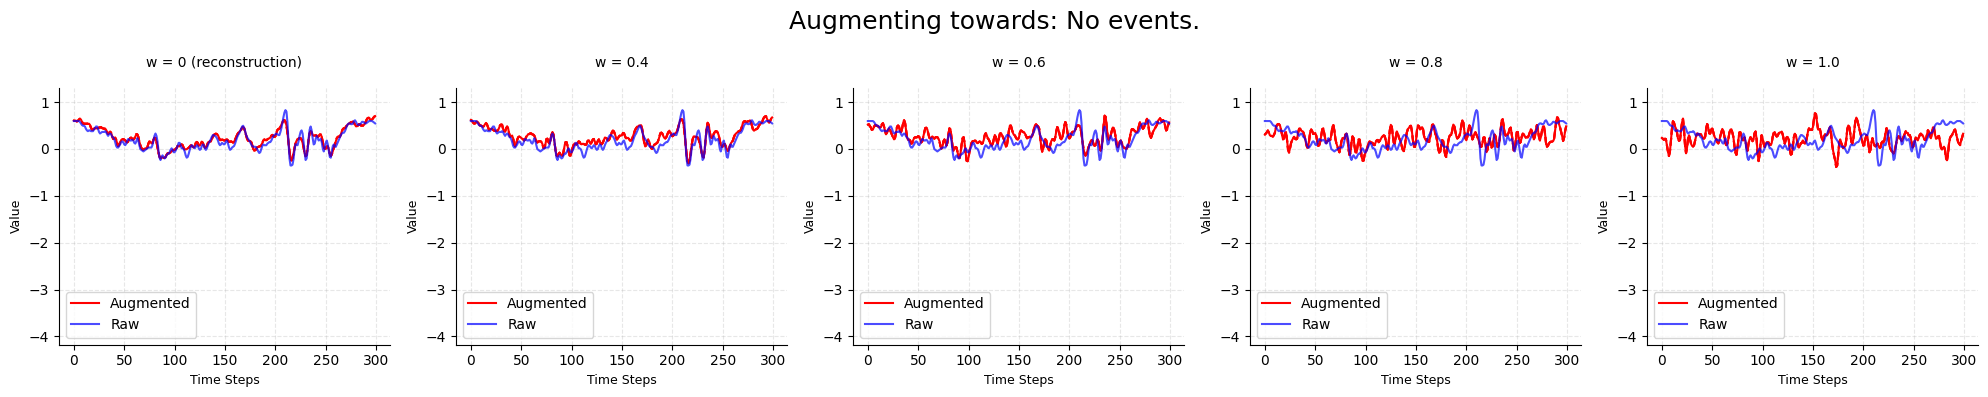

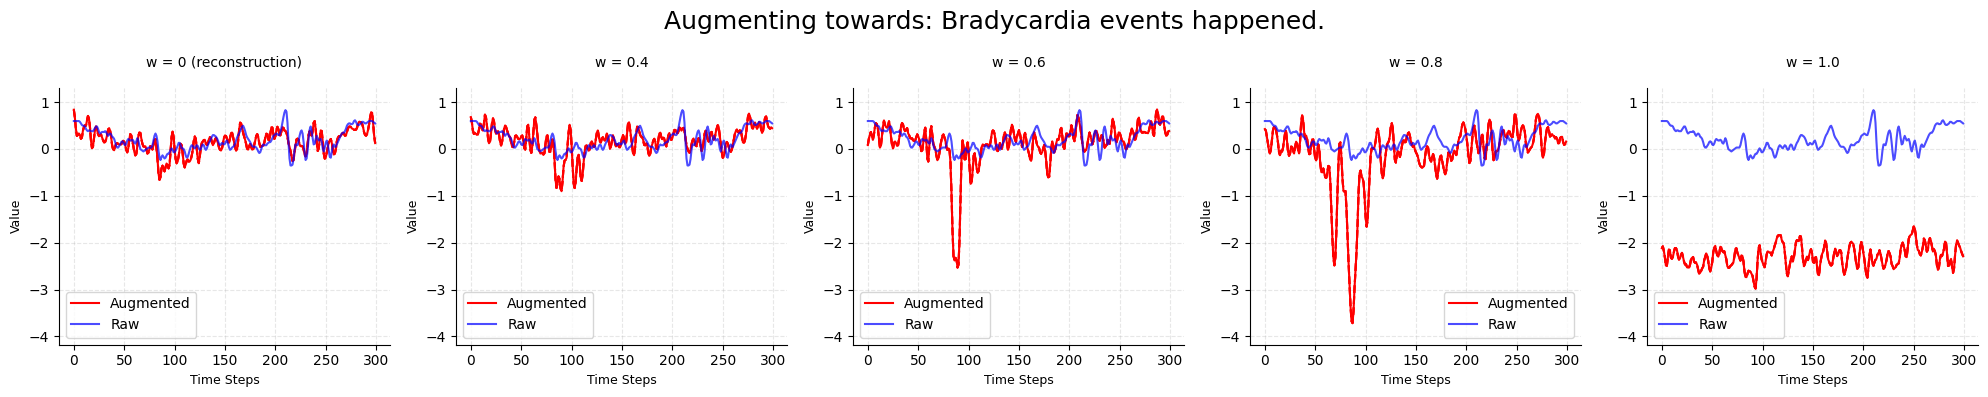

0    Bradycardia events happened.
Name: description_ts_event_binary, dtype: object


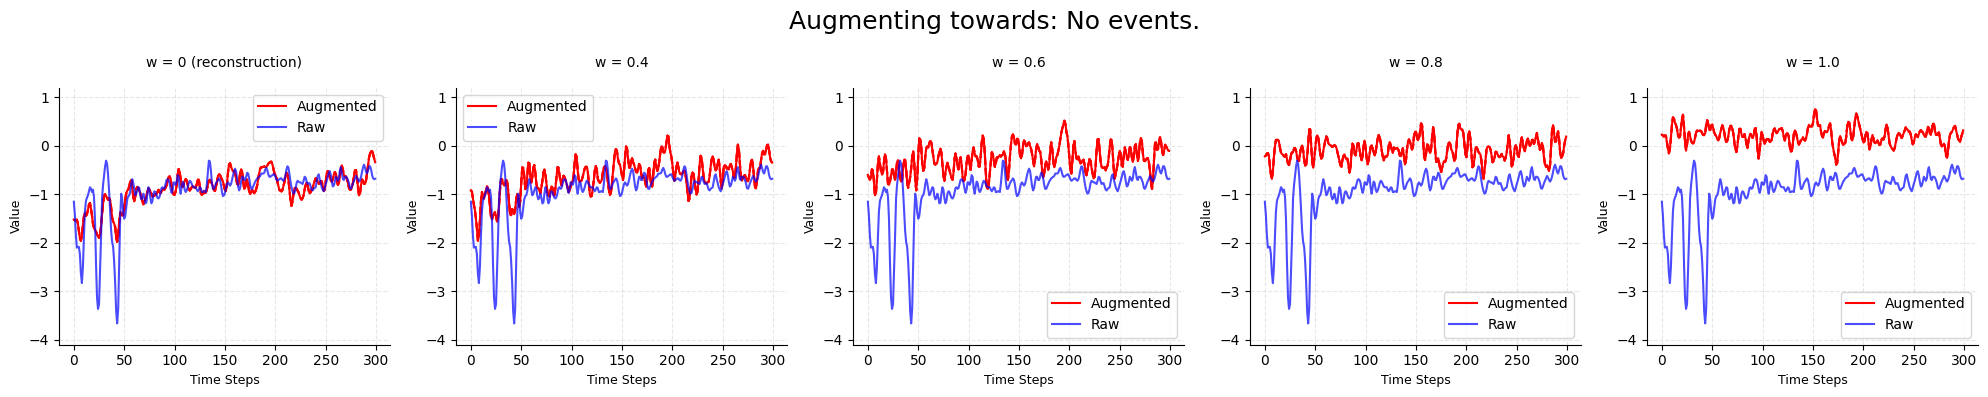

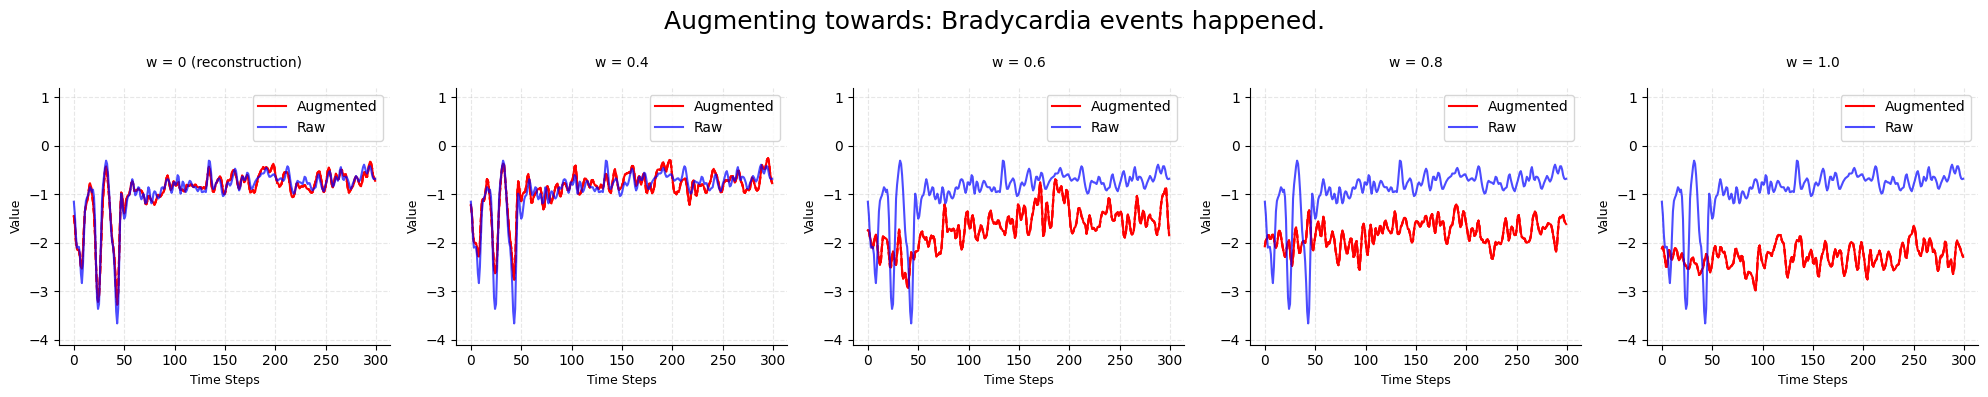

In [6]:
tid=0
# viz_generation_marginal(df_train, model, config_dict, tid=tid)
viz_generation_conditional(df_train, model, config_dict, tid=tid, sampling=True, b=1, ep=1)

description_ts_event_binary


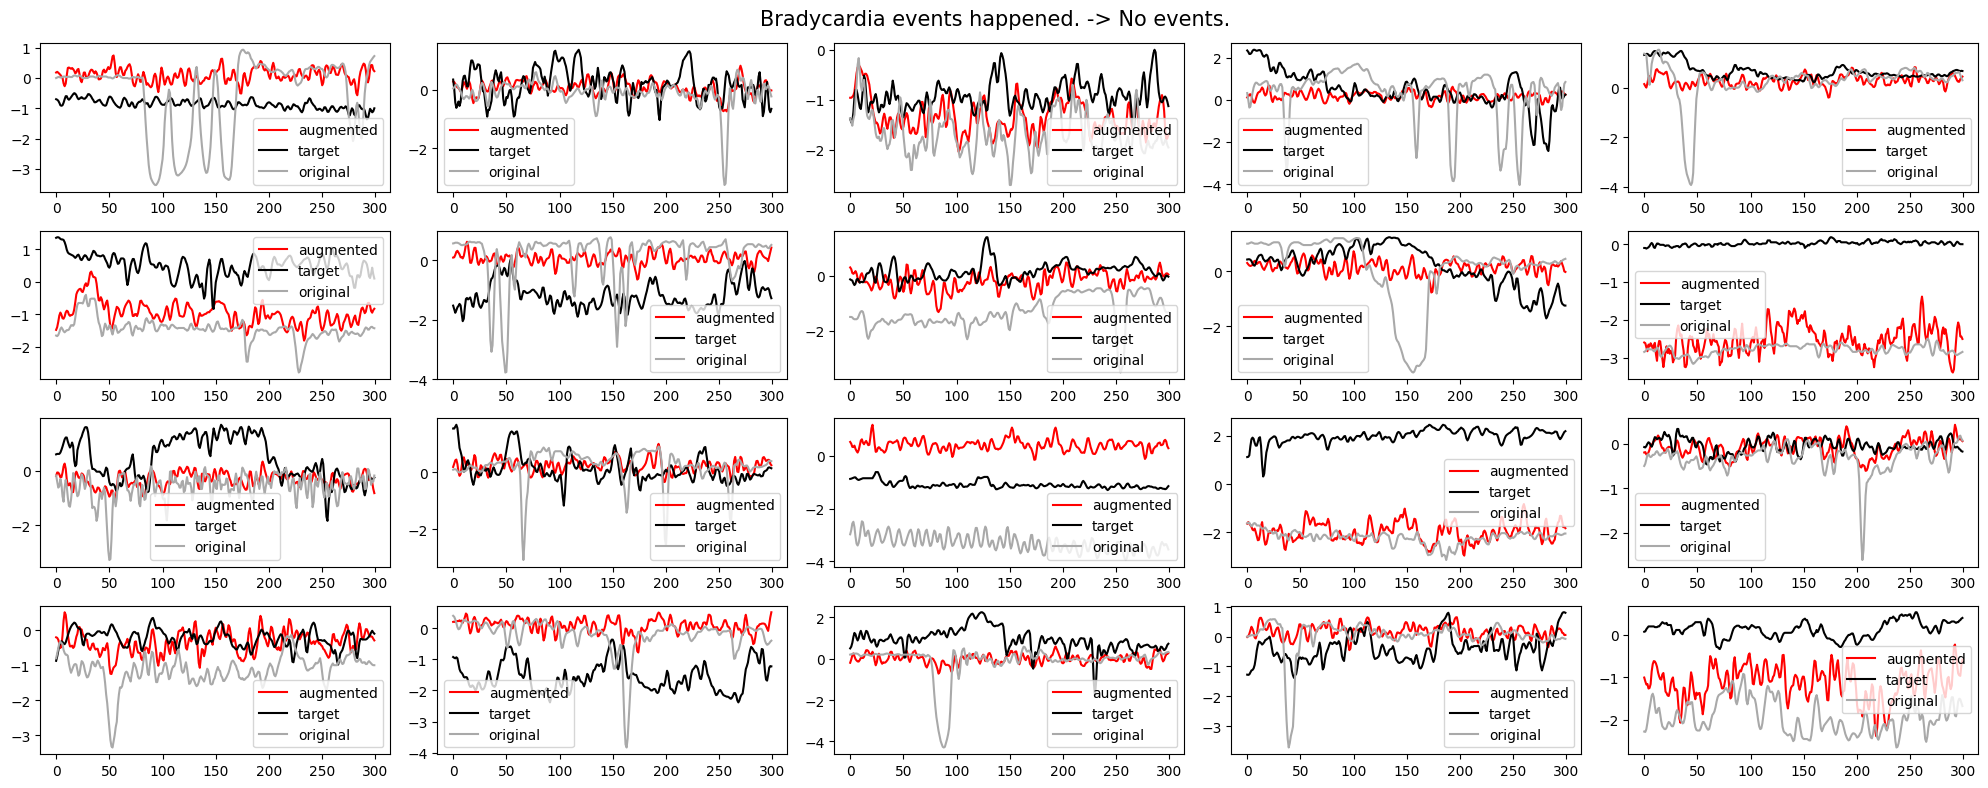

Similarity: 100%|██████████| 40000/40000 [00:15<00:00, 2621.56it/s]


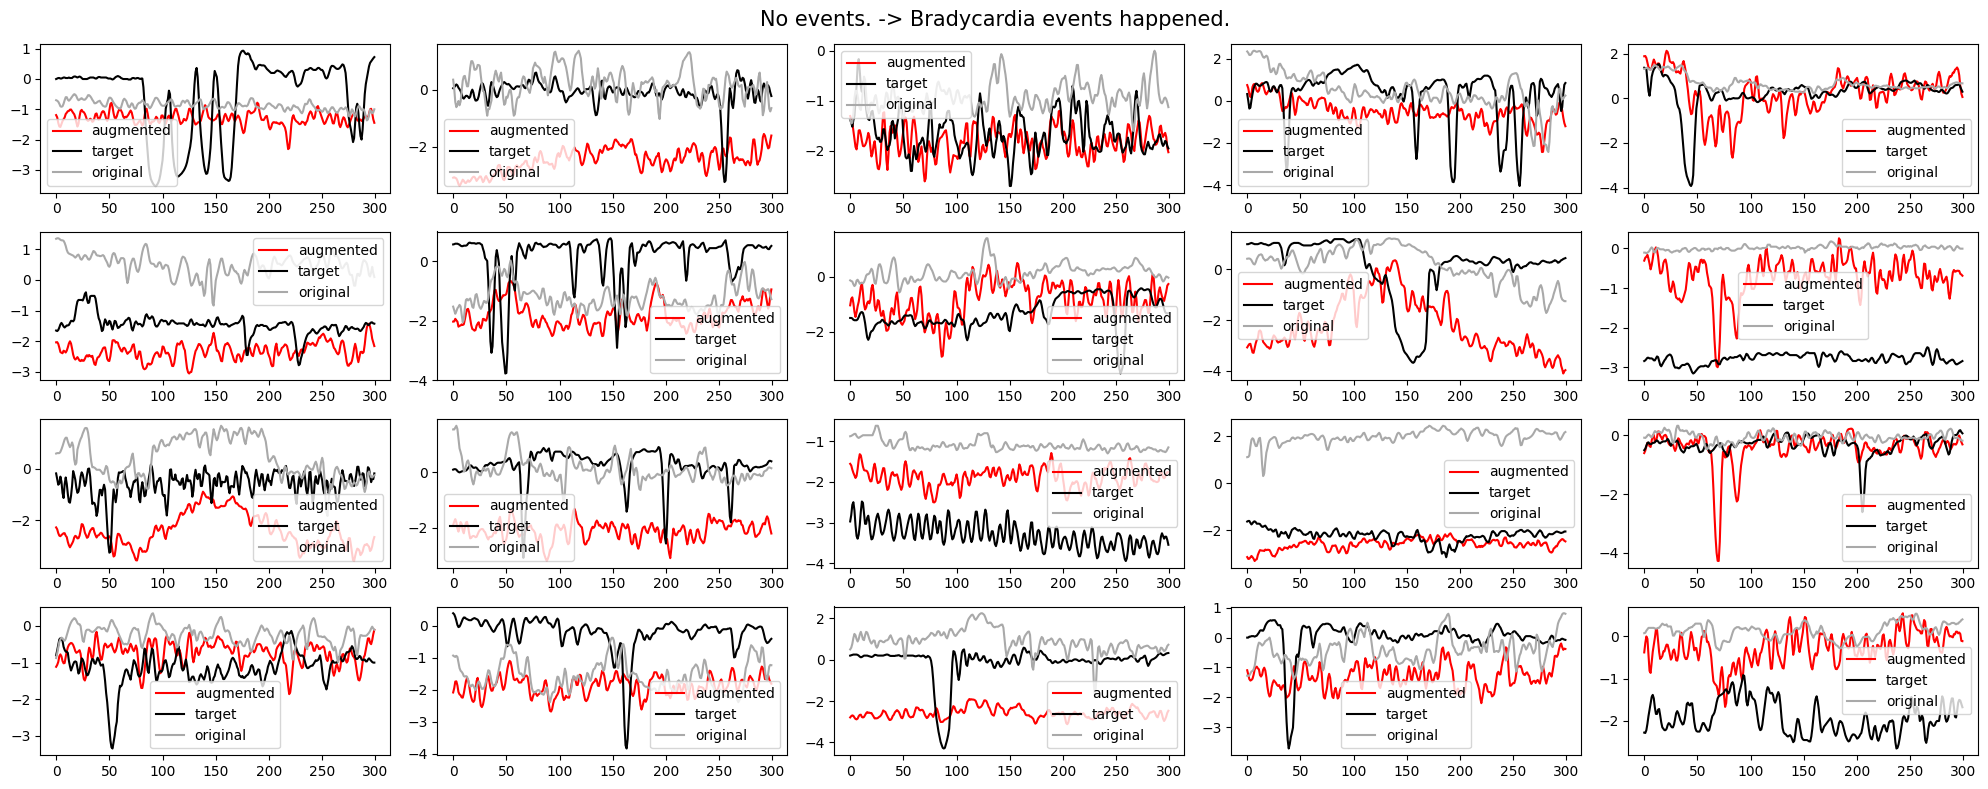

Similarity: 100%|██████████| 40000/40000 [00:15<00:00, 2603.06it/s]


description_ts_event_binary


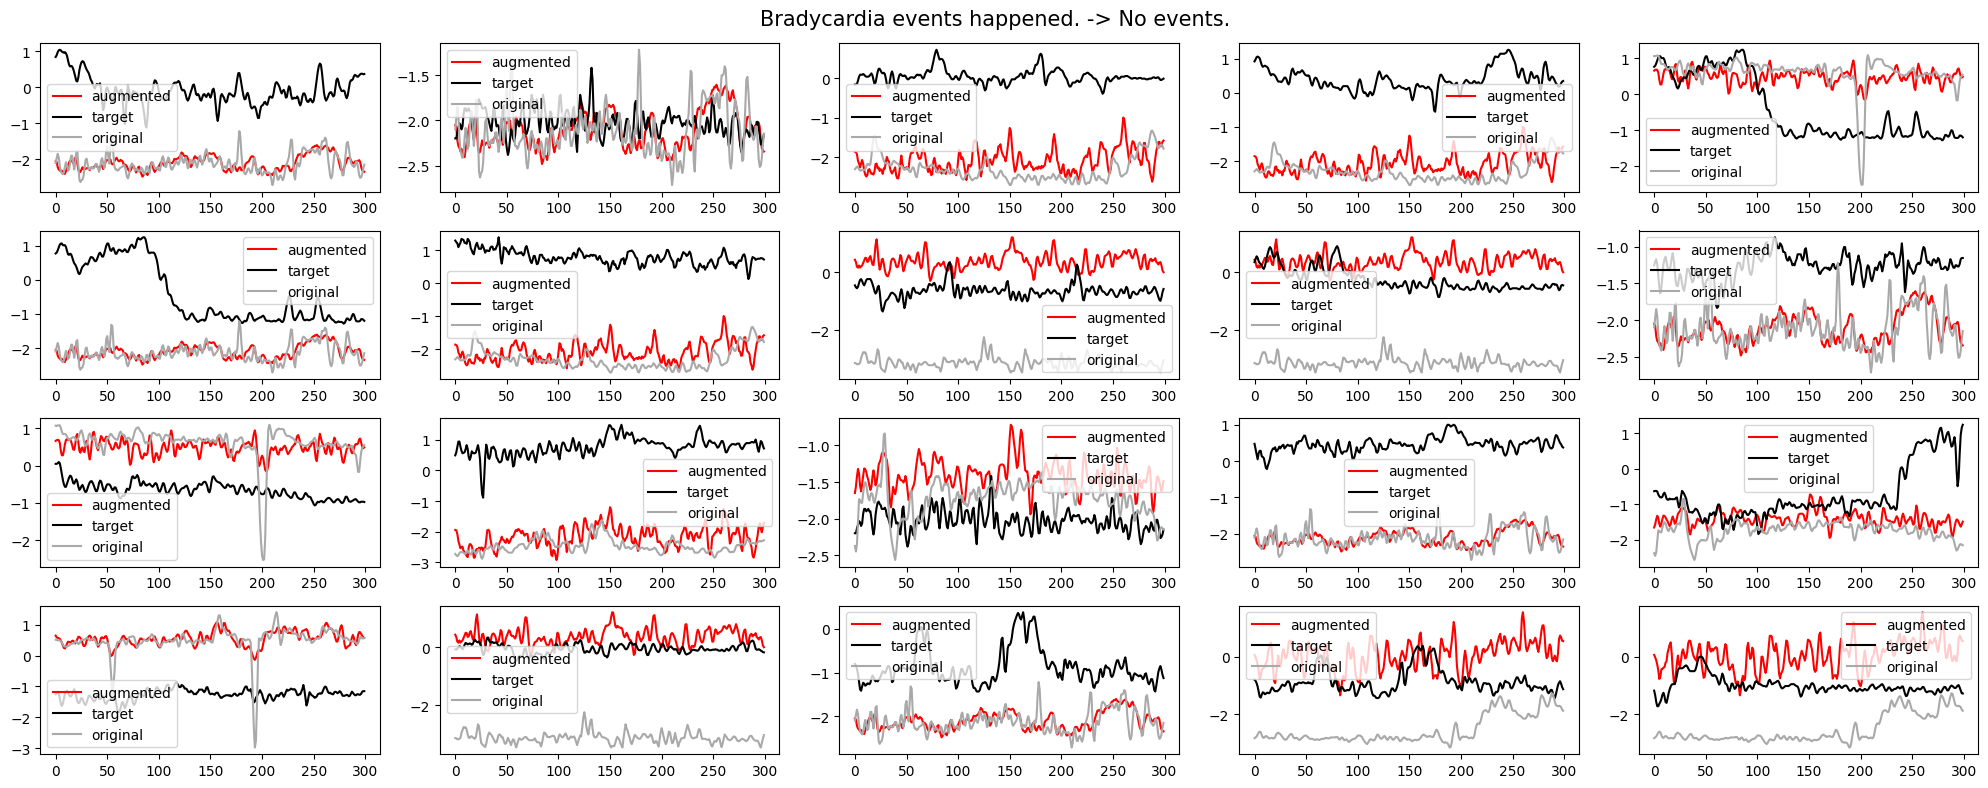

Similarity: 100%|██████████| 40000/40000 [00:15<00:00, 2622.02it/s]


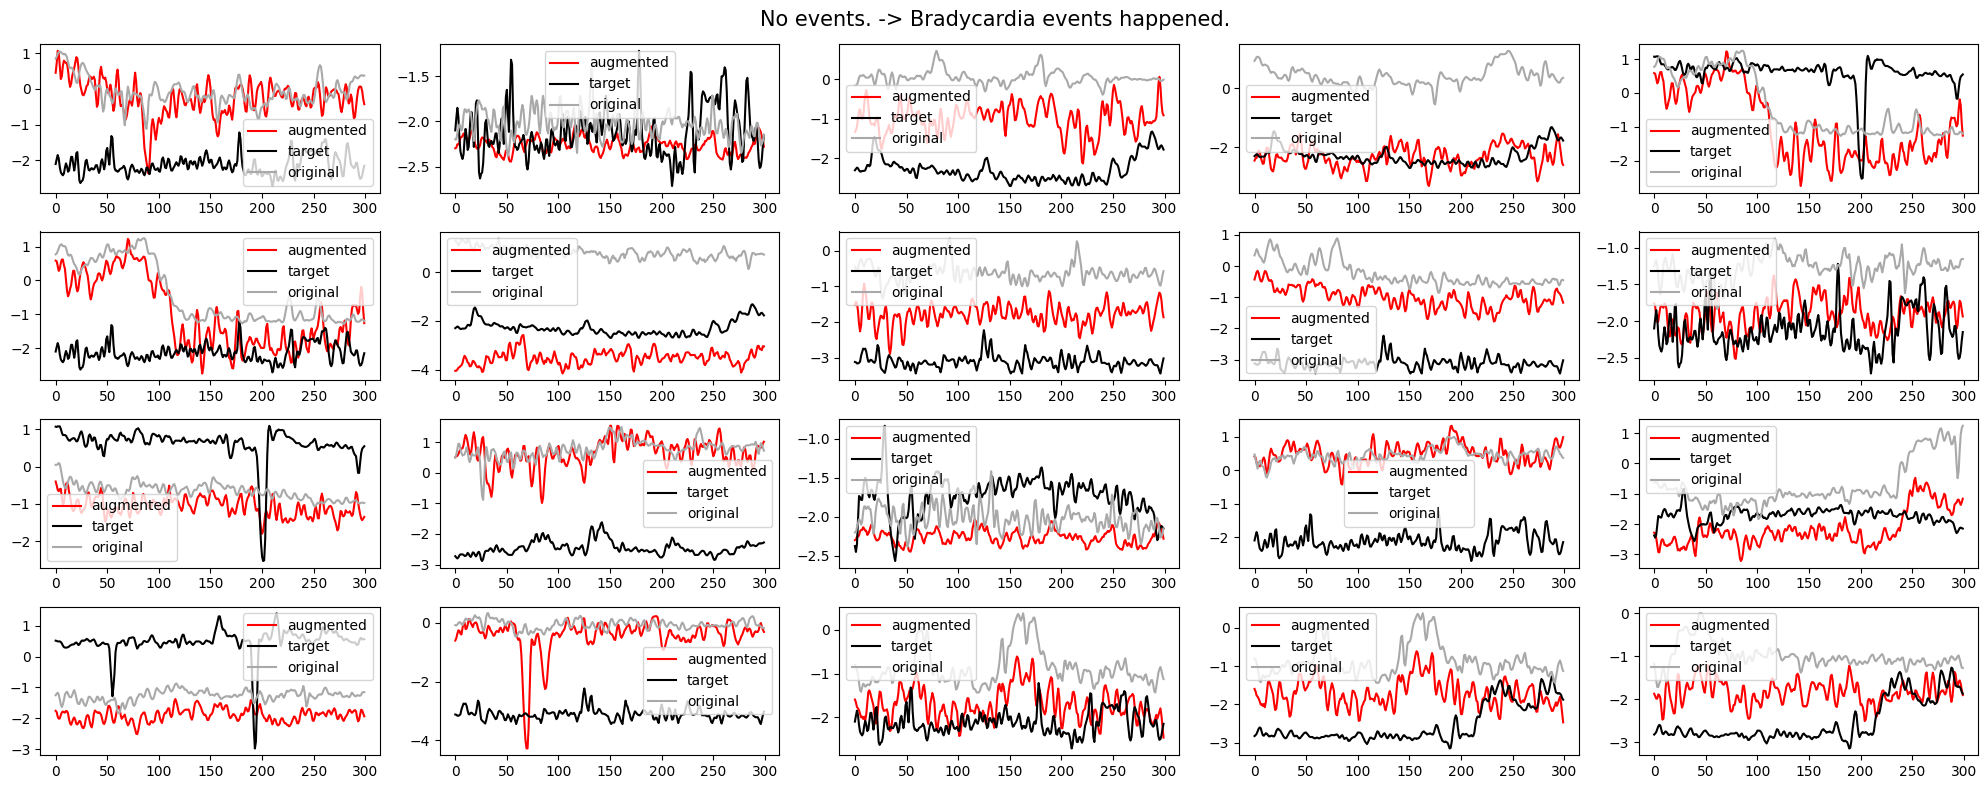

Similarity: 100%|██████████| 40000/40000 [00:15<00:00, 2630.13it/s]


Early stopping at epoch 1071


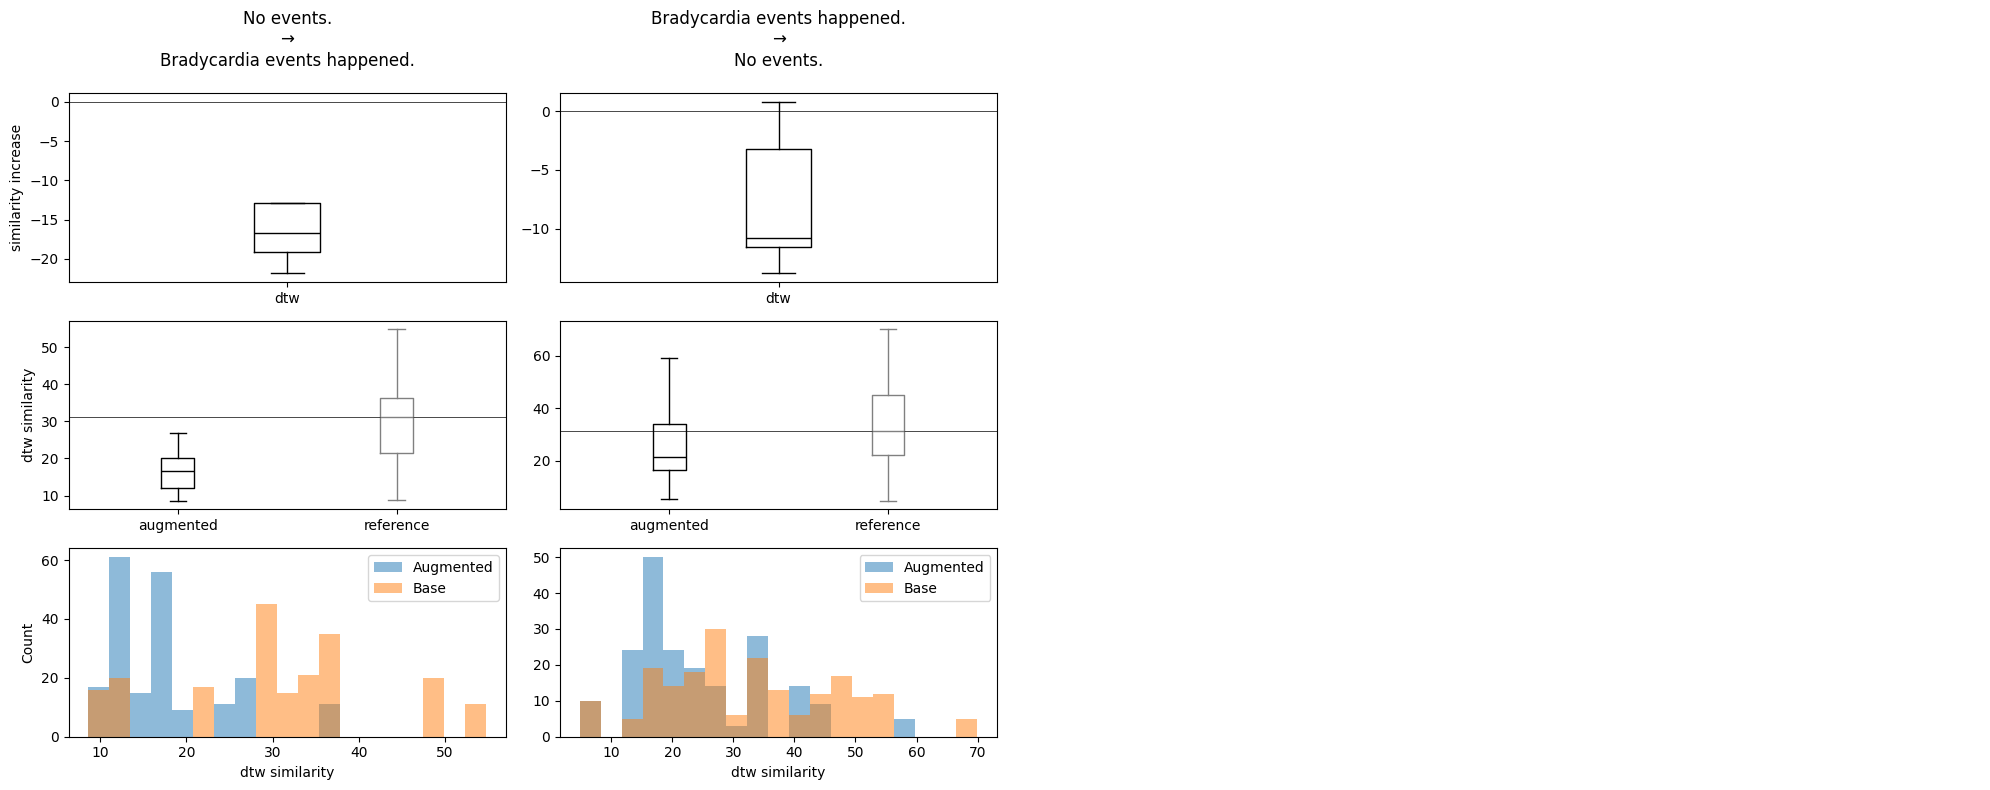

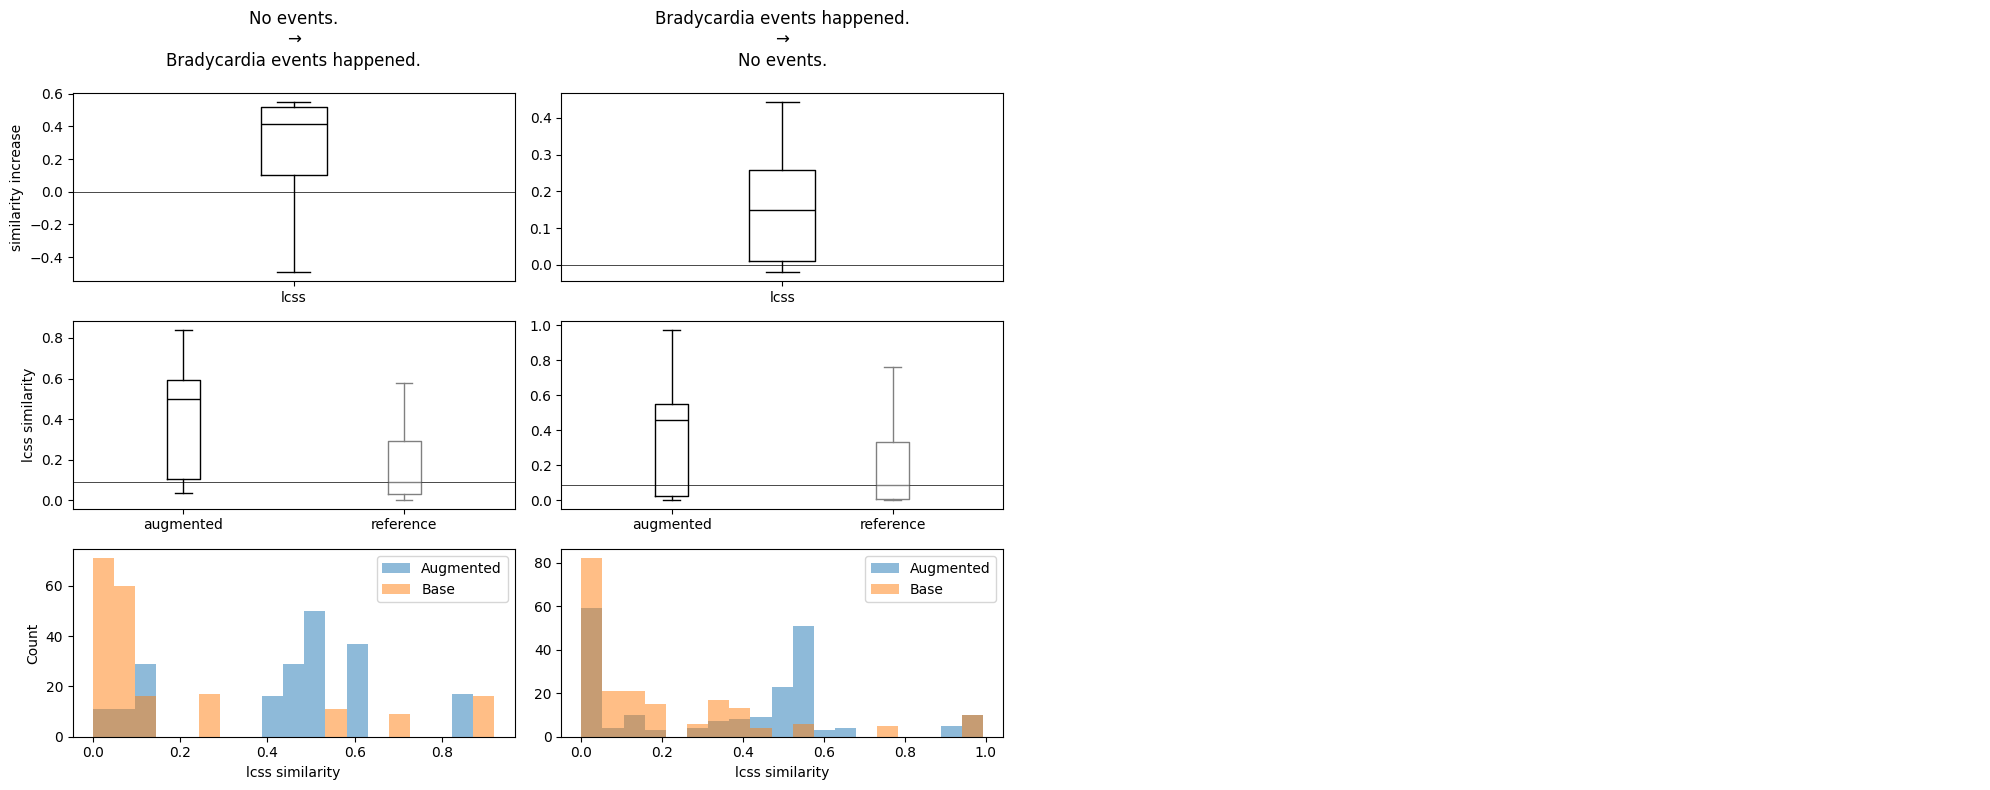

--------------------------------------------------------------------------------


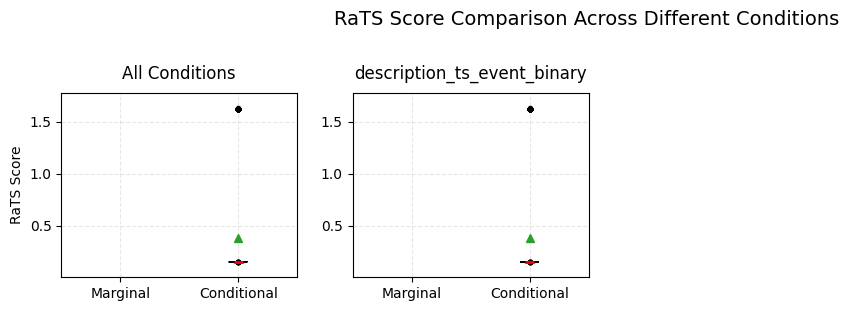

In [7]:
w = 0.8
with open('run/eval.py', 'r') as file:
    exec(file.read())
with open('run/eng_eval.py', 'r') as file:
    exec(file.read())


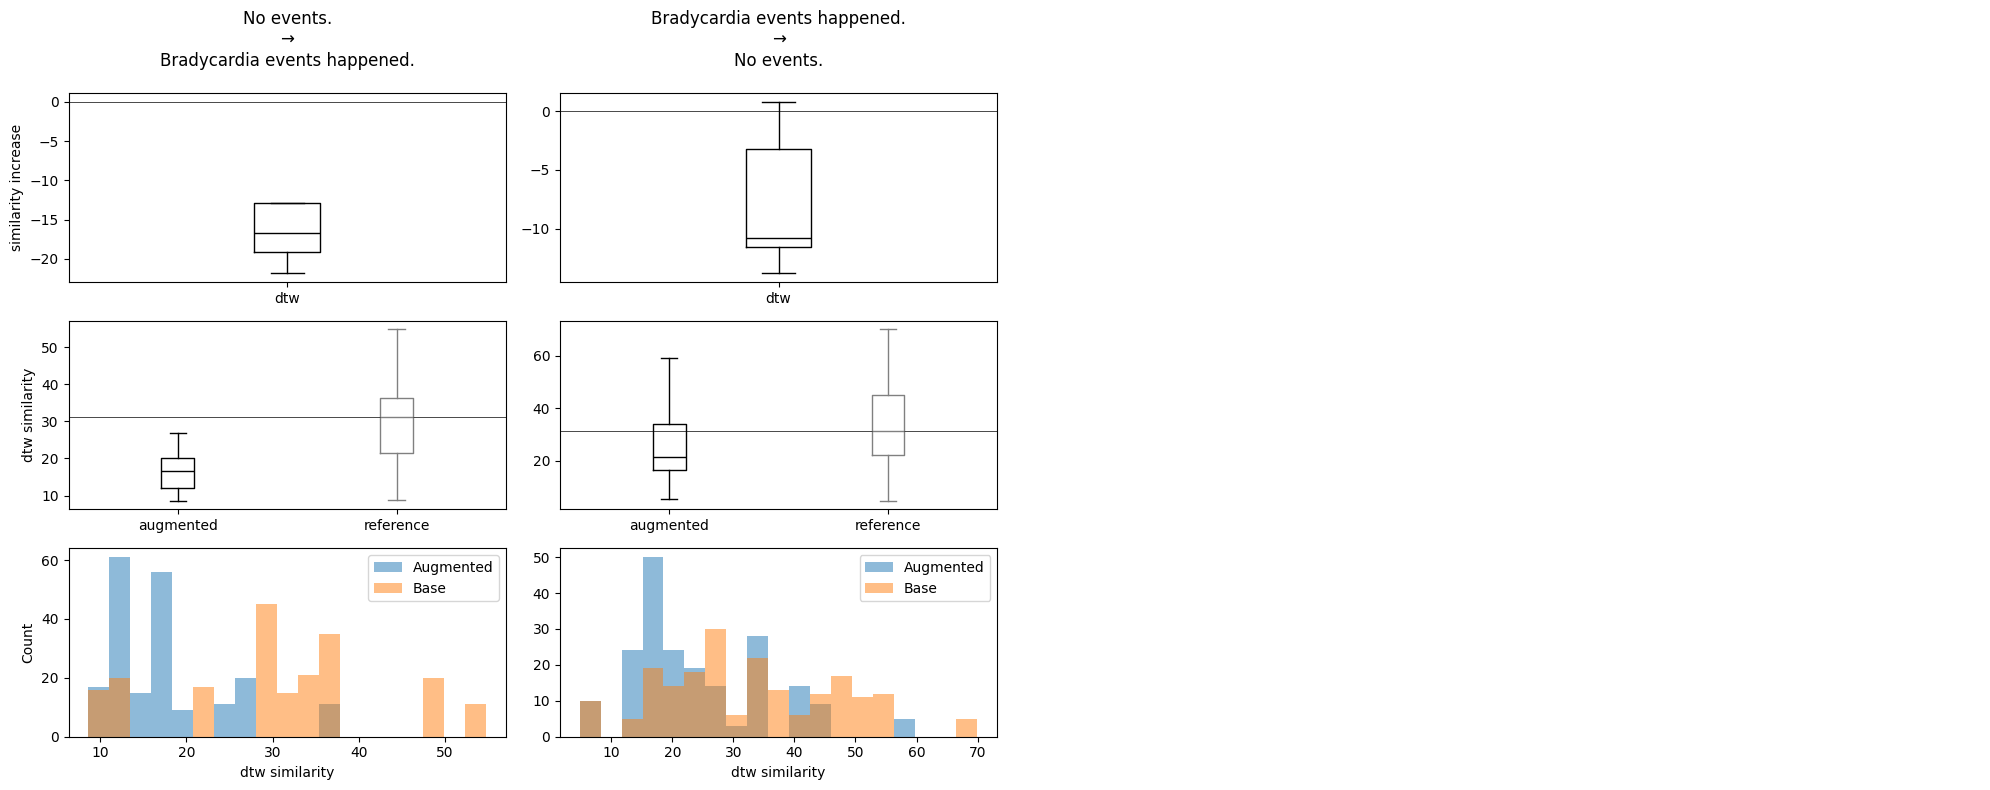

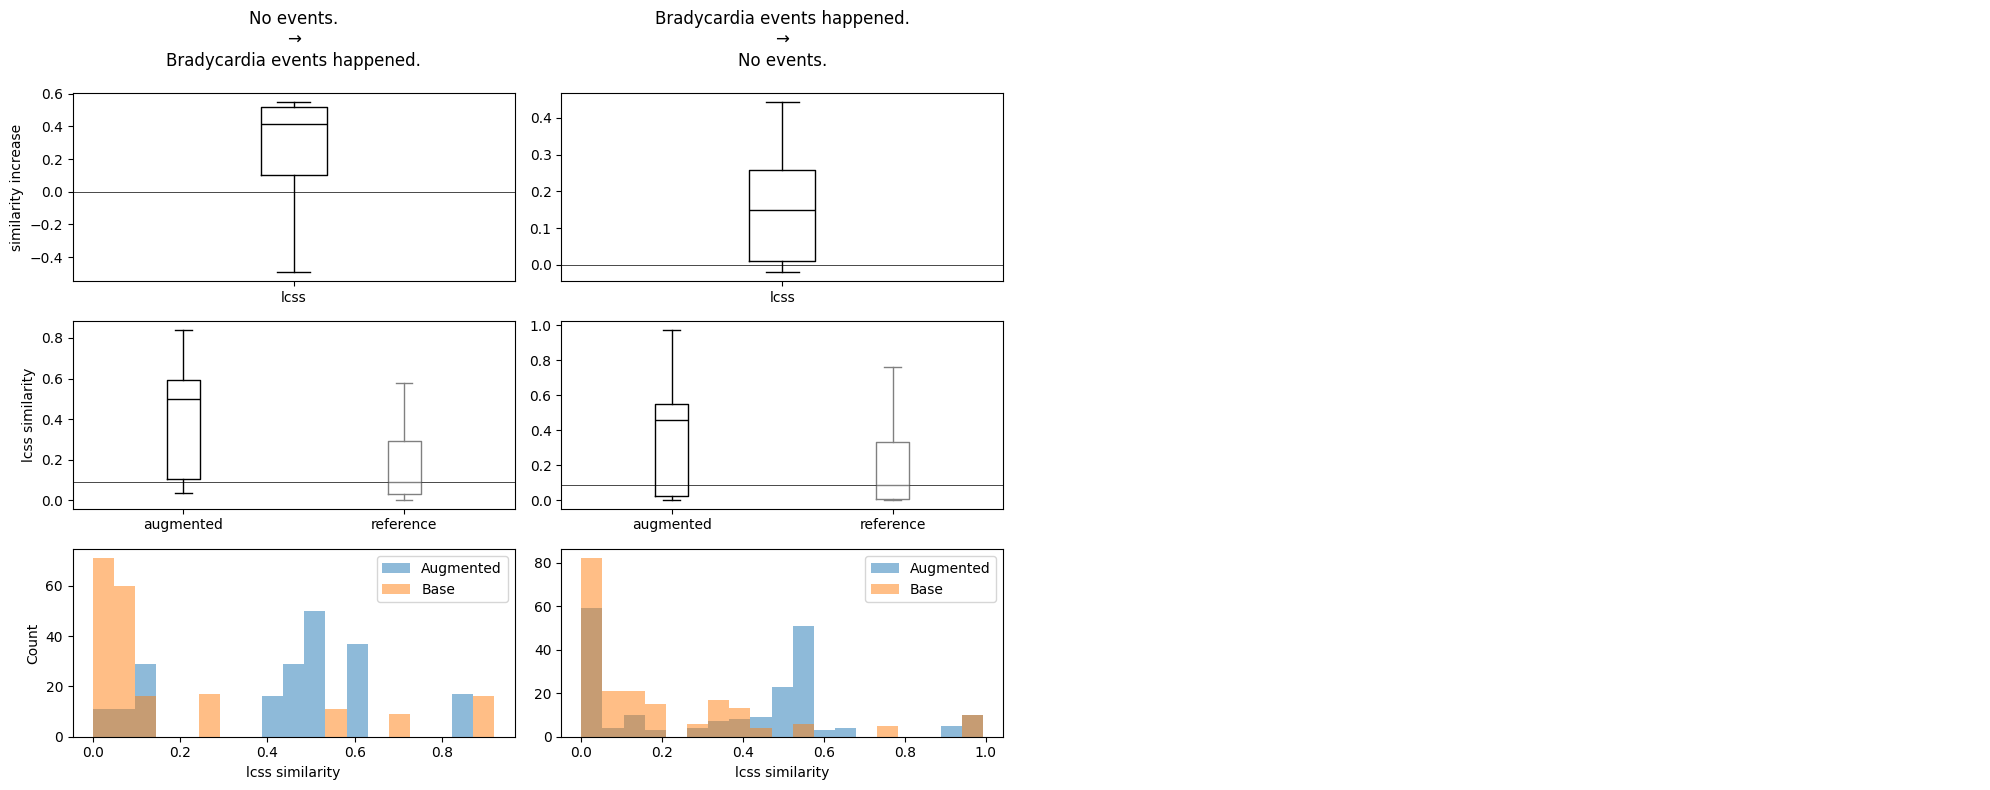

--------------------------------------------------------------------------------


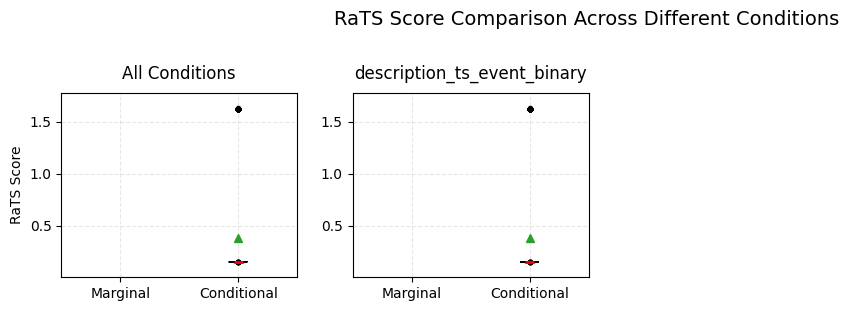

In [22]:
w = 0.8
with open('run/eval.py', 'r') as file:
    exec(file.read())
with open('run/eng_eval.py', 'r') as file:
    exec(file.read())


In [25]:
df_rats_condi[df_rats_condi['score']<1]

aug_type                         attr   src_level  \
361   conditional  description_ts_event_binary  No events.   
362   conditional  description_ts_event_binary  No events.   
363   conditional  description_ts_event_binary  No events.   
364   conditional  description_ts_event_binary  No events.   
365   conditional  description_ts_event_binary  No events.   
...           ...                          ...         ...   
2356  conditional  description_ts_event_binary  No events.   
2357  conditional  description_ts_event_binary  No events.   
2358  conditional  description_ts_event_binary  No events.   
2359  conditional  description_ts_event_binary  No events.   
2360  conditional  description_ts_event_binary  No events.   

                         tgt_level metric     score  
361   Bradycardia events happened.   RaTS  0.151574  
362   Bradycardia events happened.   RaTS  0.151627  
363   Bradycardia events happened.   RaTS  0.151774  
364   Bradycardia events happened.   RaTS  0.151630  
365   Bradycardia events happened.   RaTS  0.151386  
...                            ...    ...       ...  
2356  Bradycardia events happened.   RaTS  0.151619  
2357  Bradycardia events happened.   RaTS  0.151571  
2358  Bradycardia events happened.   RaTS  0.151677  
2359  Bradycardia events happened.   RaTS  0.151826  
2360  Bradycardia events happened.   RaTS  0.151534  

[2000 rows x 6 columns]

In [8]:
summarize_scores(df_all)

metric      DTW distance decrease ↓ LCSS similarity increase ↑       RaTS ↑
final_score           -10.79 (8.07)                0.20 (0.28)  0.38 (0.53)

In [9]:
summarize_scores(df_all, mean_sd = False)

metric      DTW distance decrease ↓ LCSS similarity increase ↑  \
final_score  -12.14 [-16.64, -8.92]          0.22 [0.03, 0.43]   

metric                  RaTS ↑  
final_score  0.15 [0.15, 0.15]

description_ts_event_binary


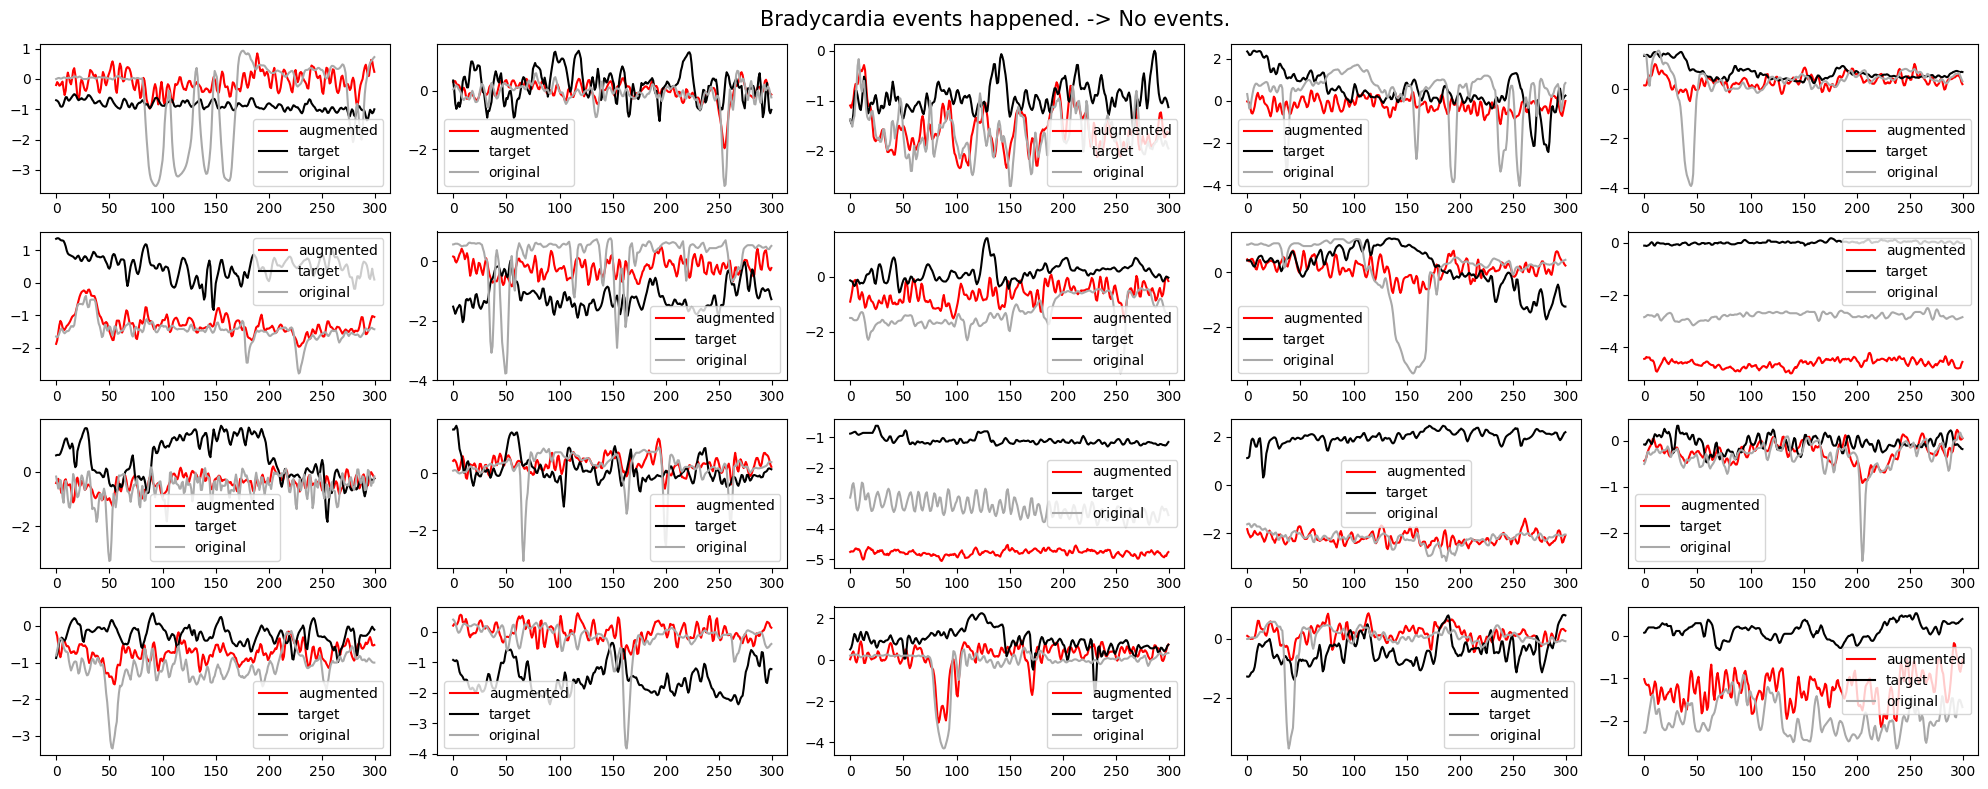

Similarity: 100%|██████████| 40000/40000 [00:15<00:00, 2575.86it/s]


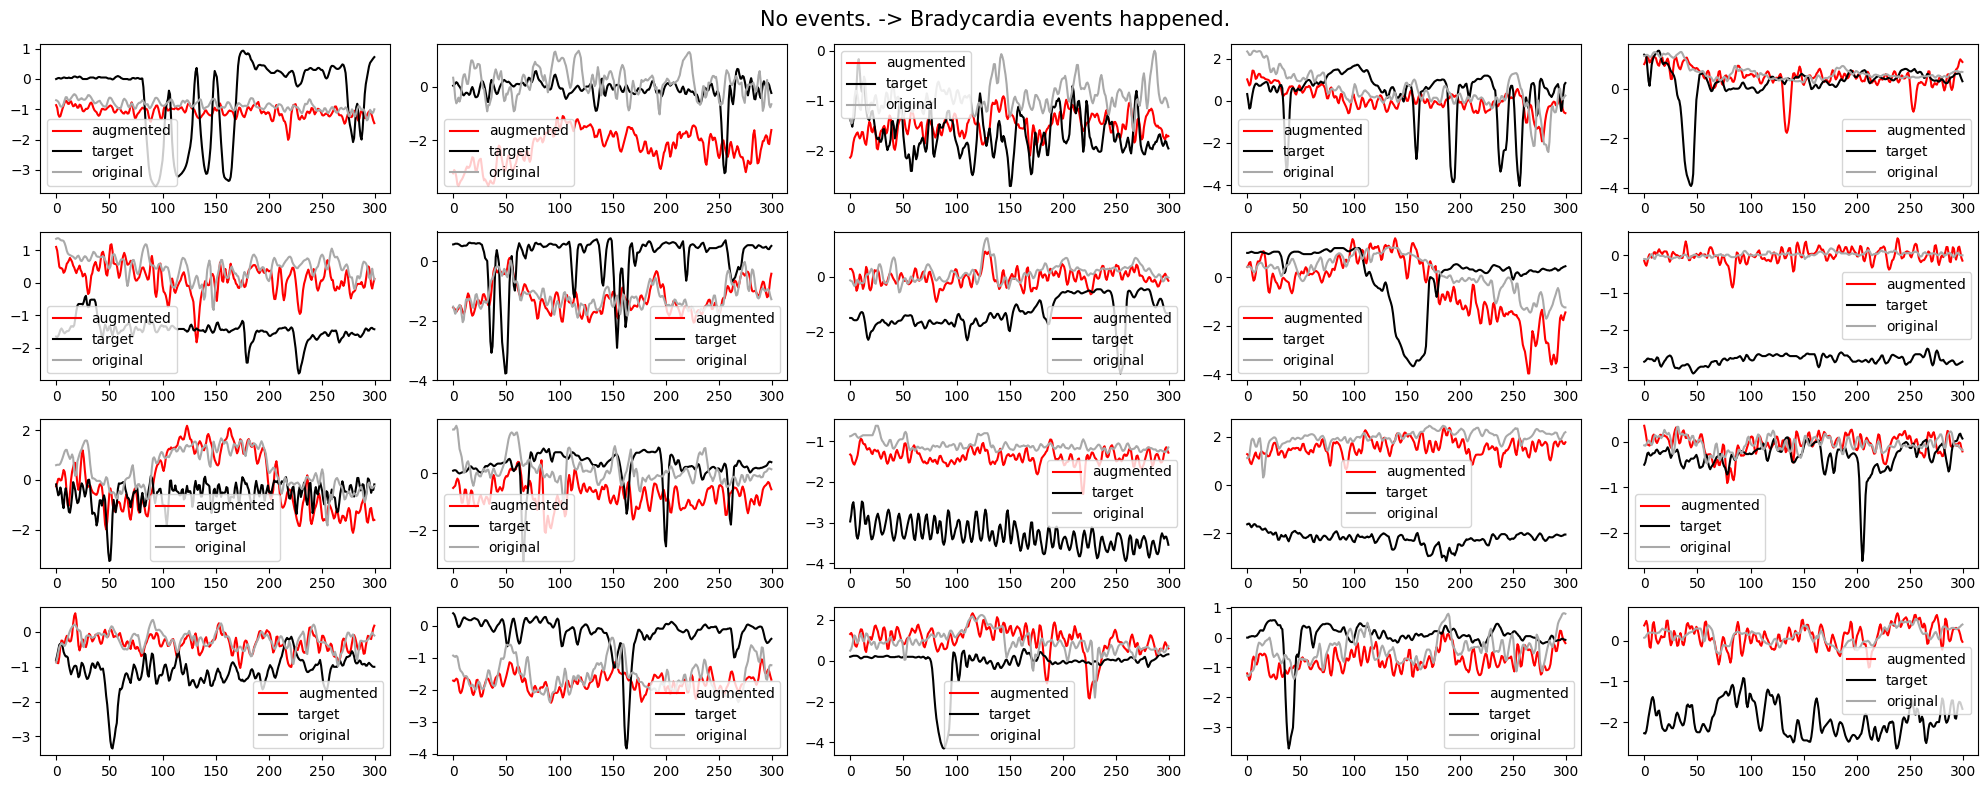

Similarity: 100%|██████████| 40000/40000 [00:15<00:00, 2570.14it/s]


description_ts_event_binary


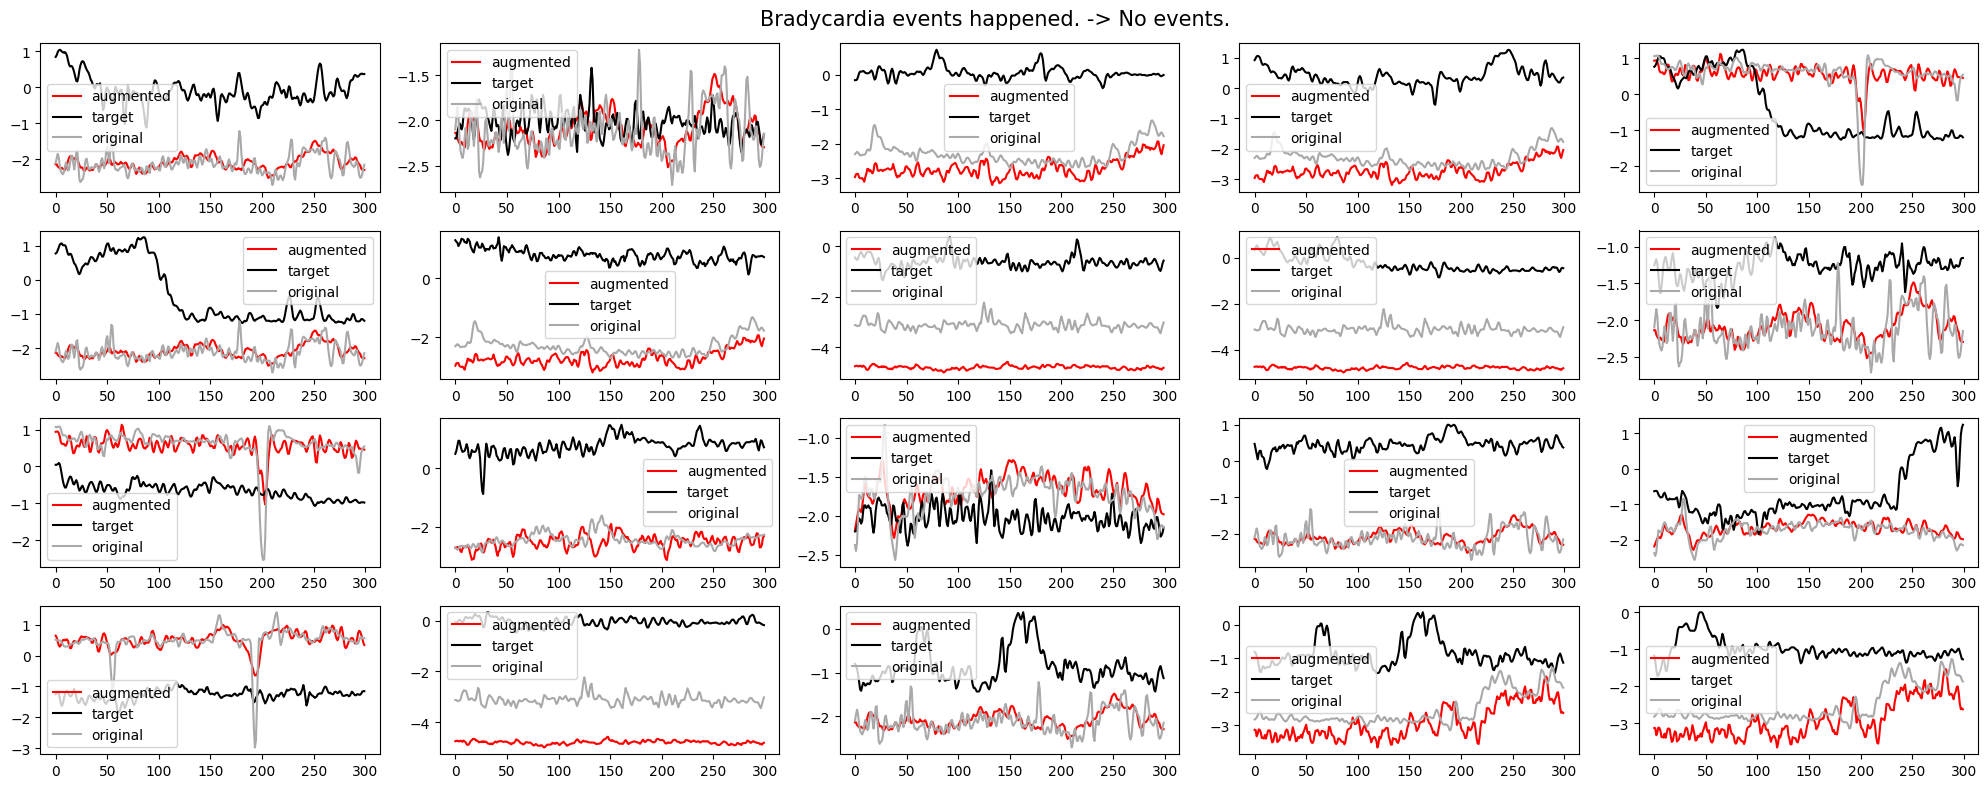

Similarity: 100%|██████████| 40000/40000 [00:15<00:00, 2592.88it/s]


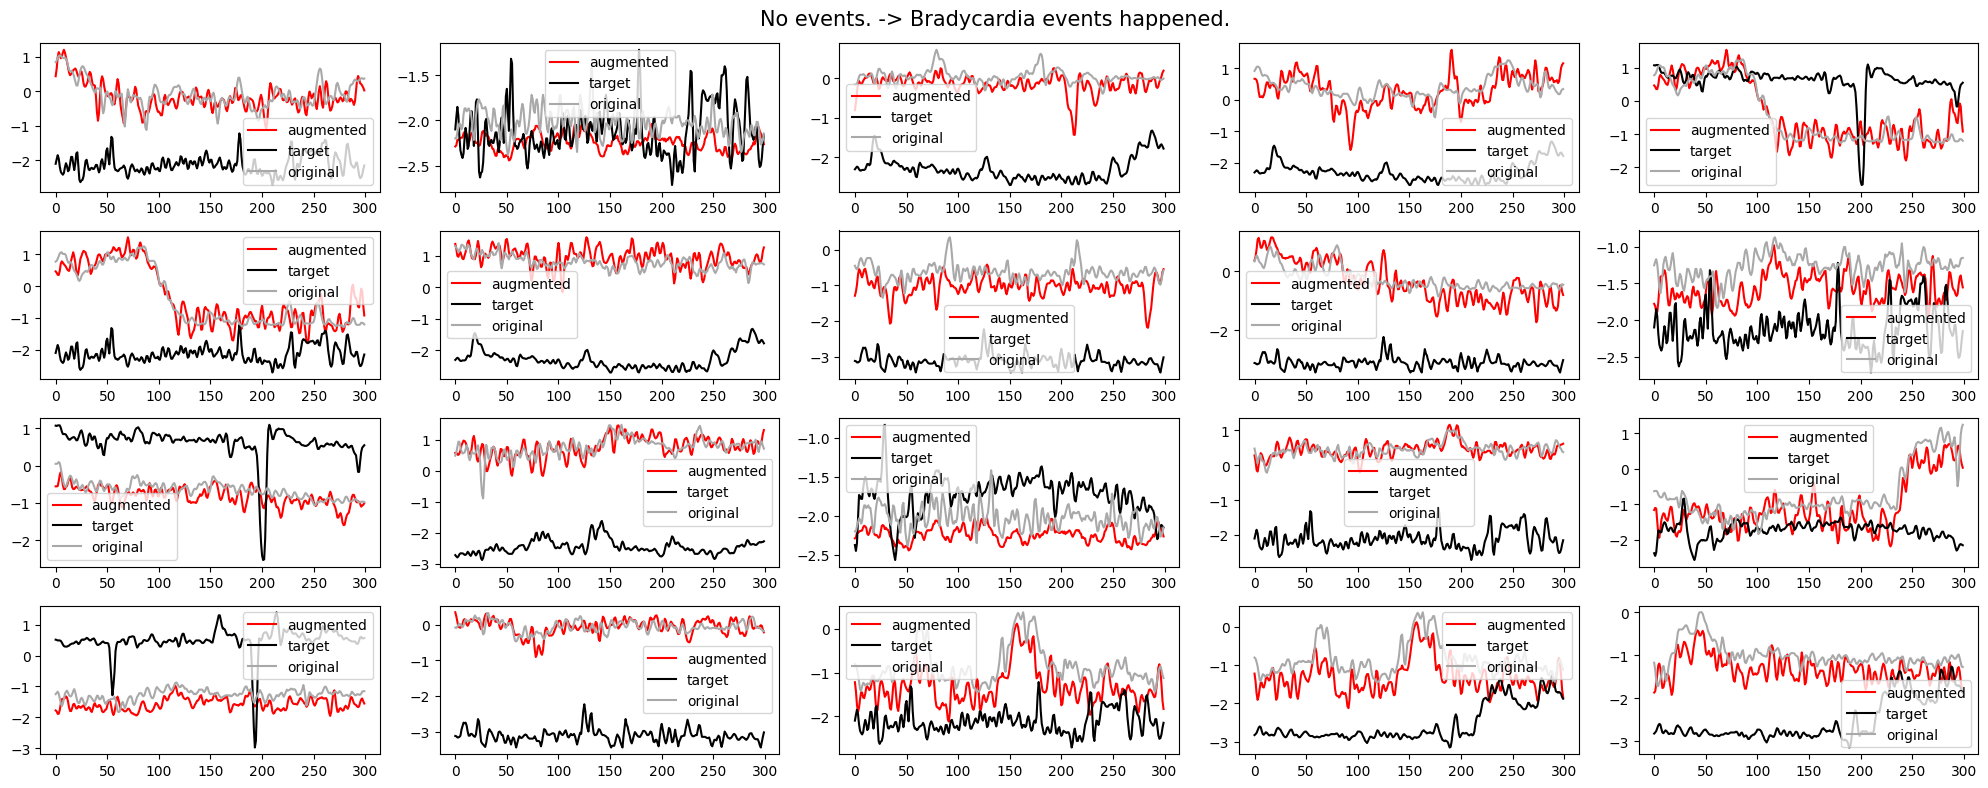

Similarity: 100%|██████████| 40000/40000 [00:15<00:00, 2577.25it/s]


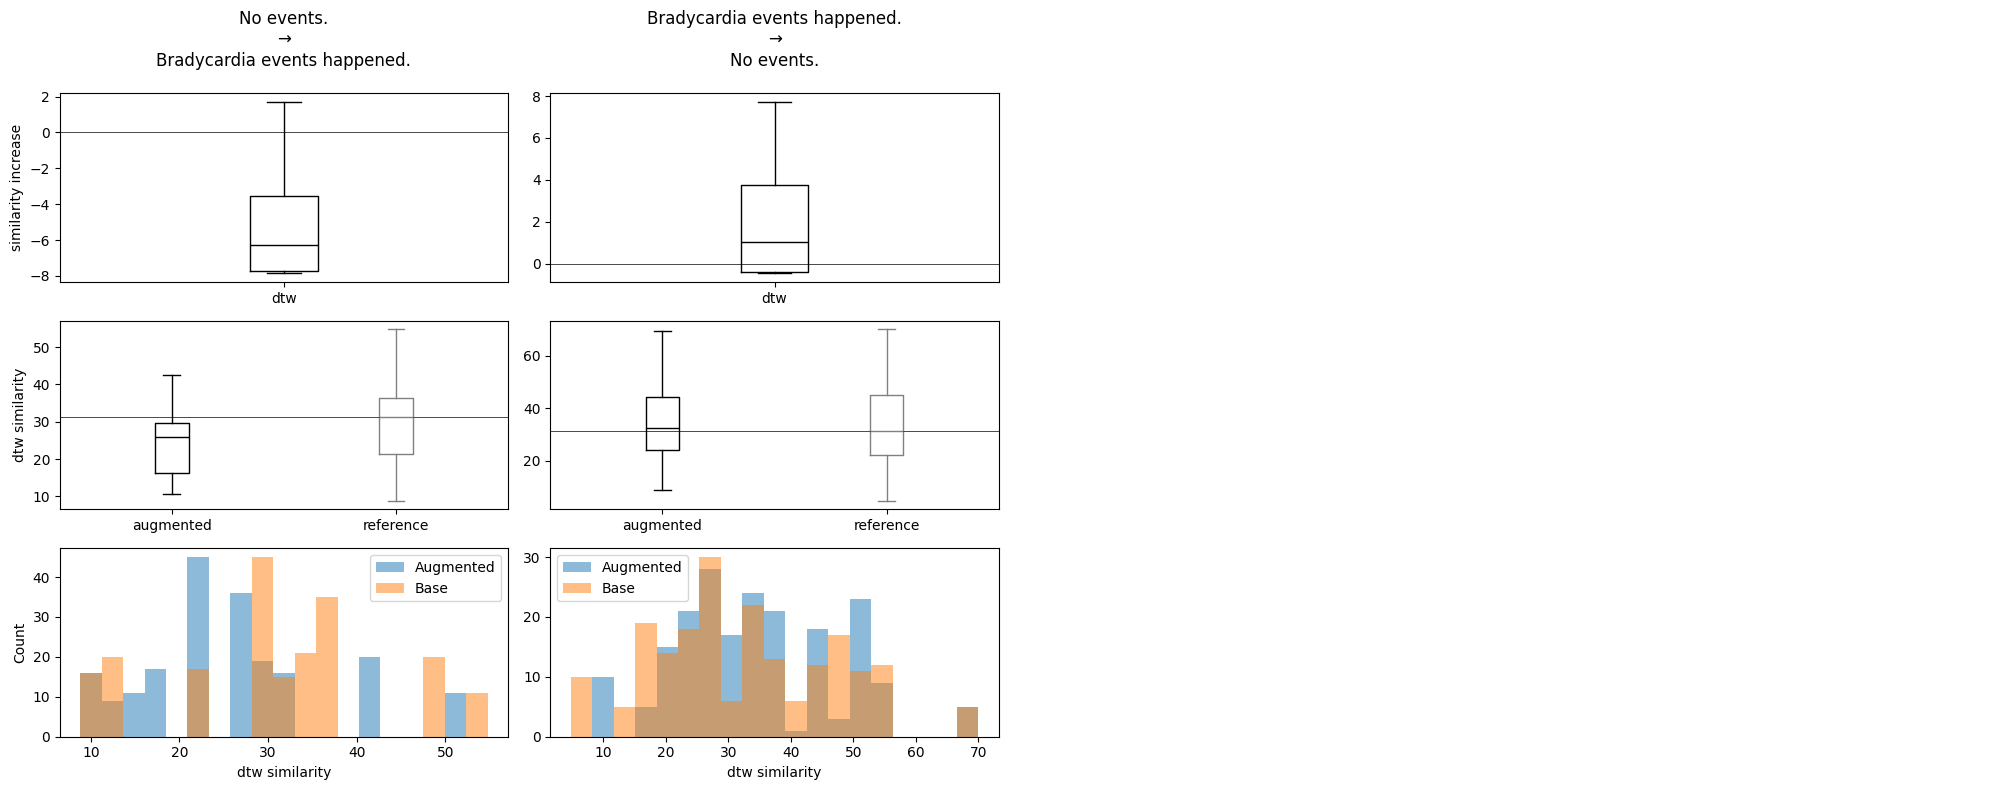

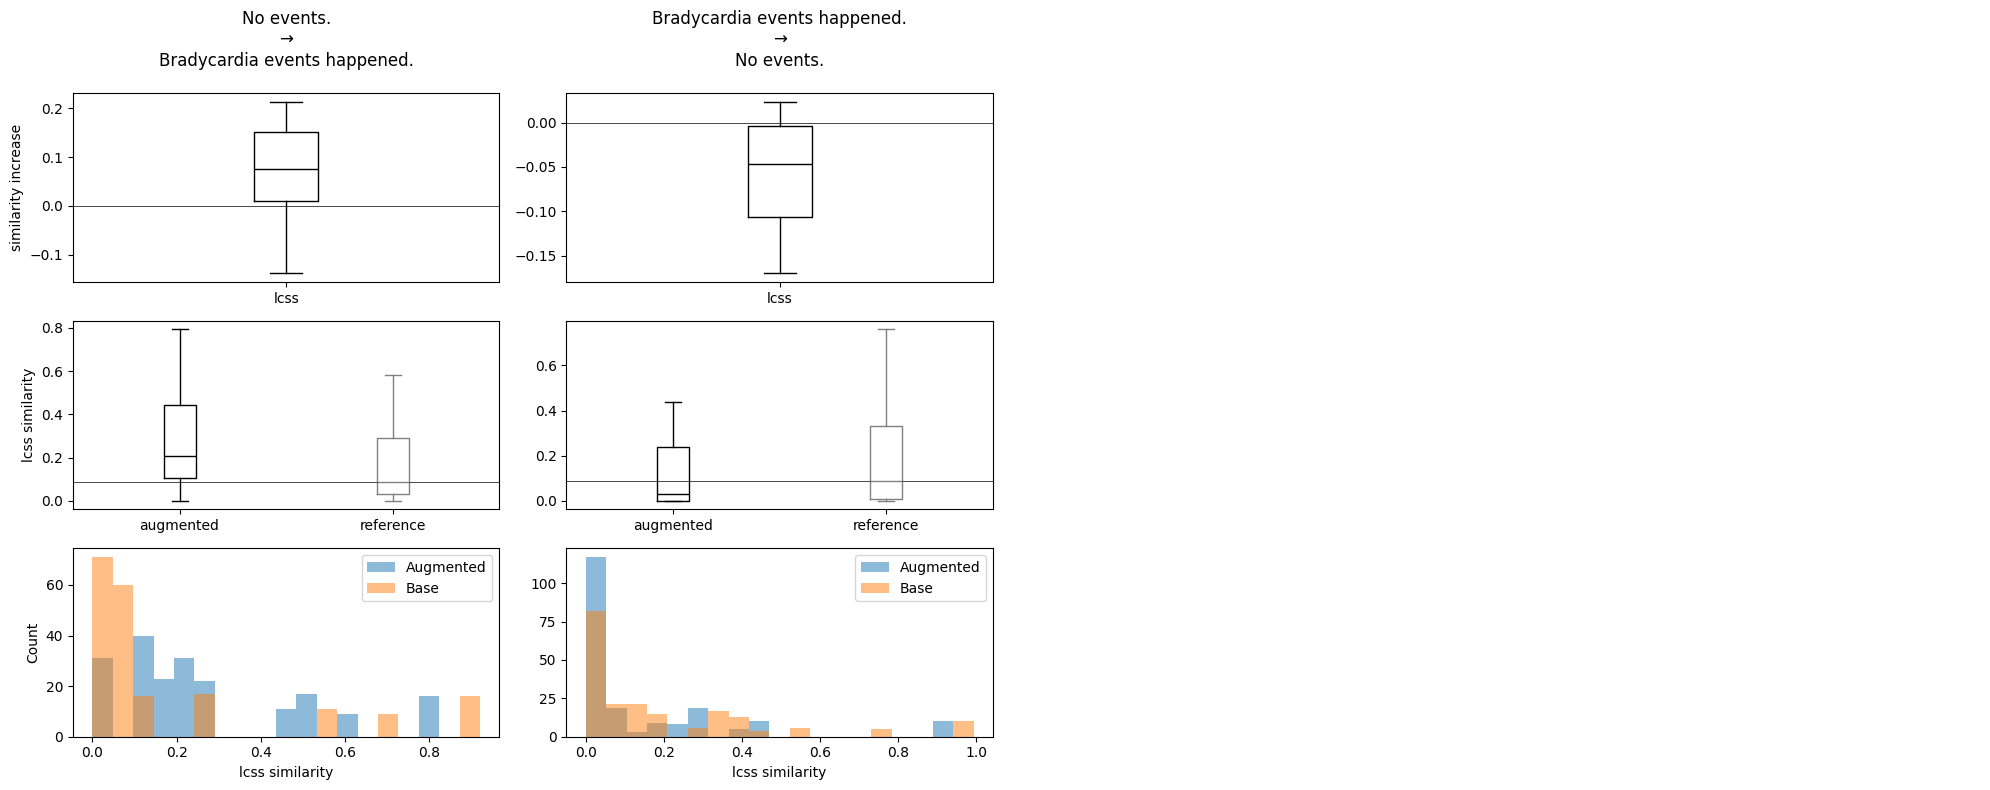

--------------------------------------------------------------------------------


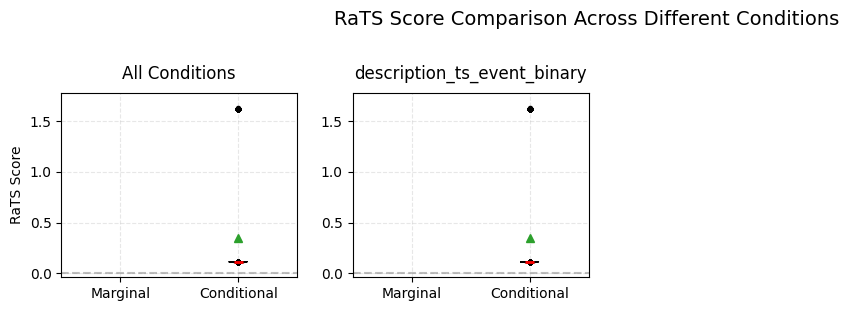

In [10]:
w = 0.6
with open('run/eval.py', 'r') as file:
    exec(file.read())
with open('run/eng_eval.py', 'r') as file:
    exec(file.read())


In [11]:
summarize_scores(df_all)

metric      DTW distance decrease ↓ LCSS similarity increase ↑       RaTS ↑
final_score            -1.55 (4.28)               -0.00 (0.11)  0.34 (0.54)

In [12]:
summarize_scores(df_all, mean_sd = False)

metric      DTW distance decrease ↓ LCSS similarity increase ↑  \
final_score     -0.43 [-6.26, 1.70]         0.00 [-0.09, 0.07]   

metric                  RaTS ↑  
final_score  0.12 [0.12, 0.12]

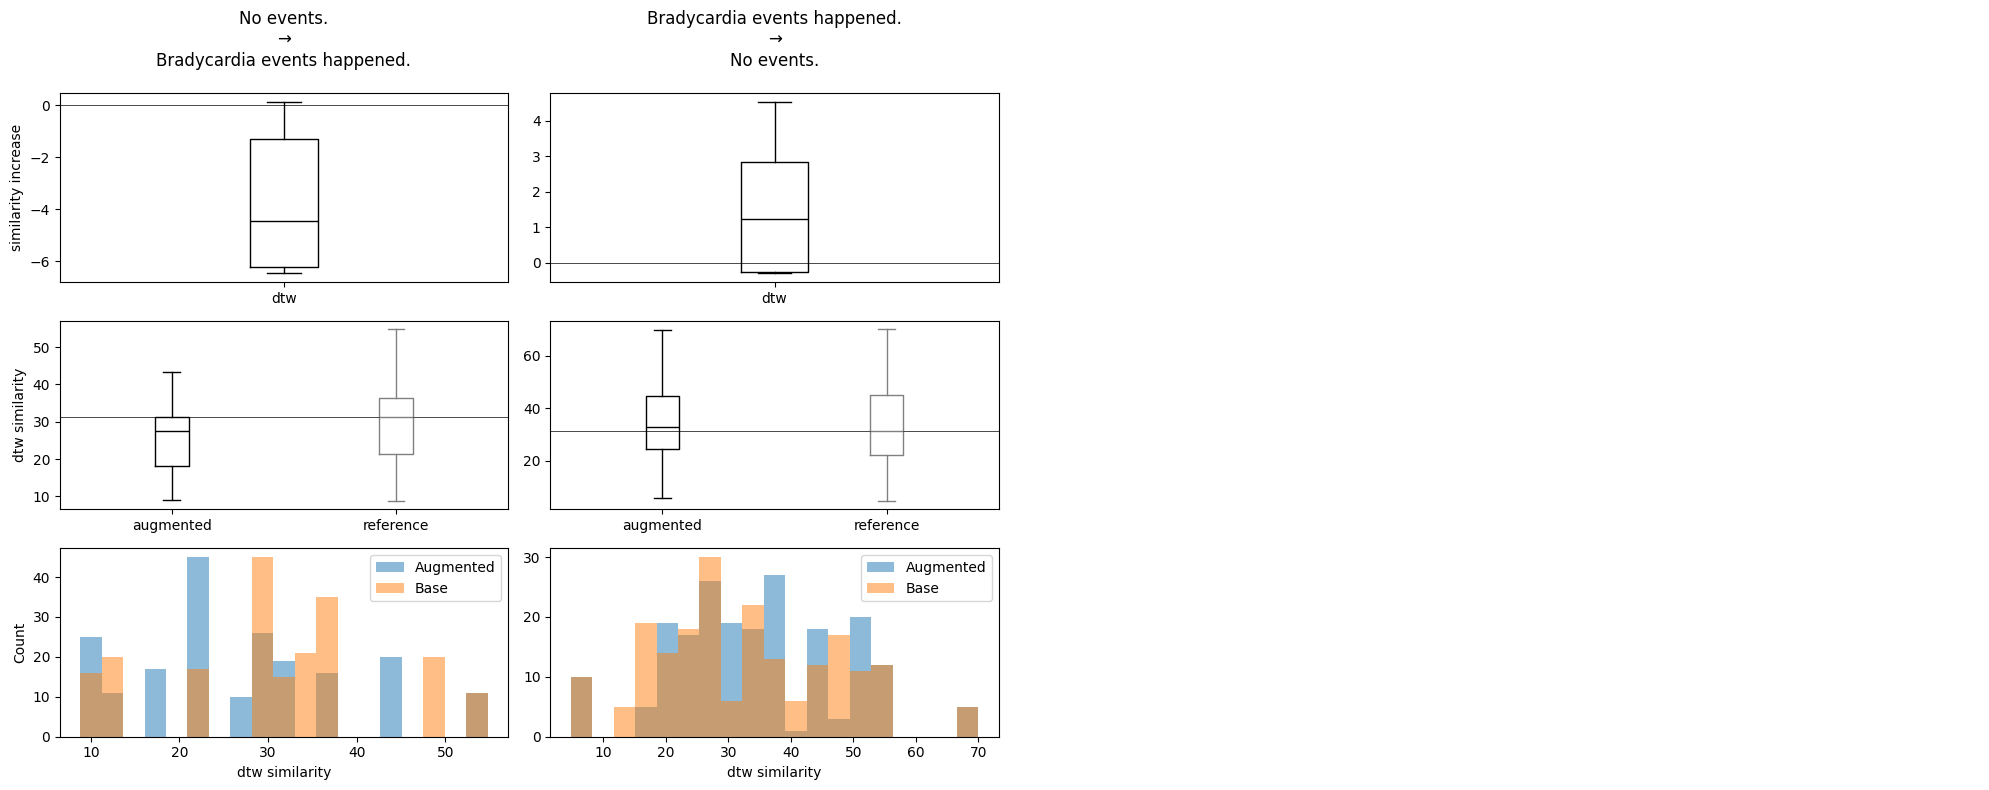

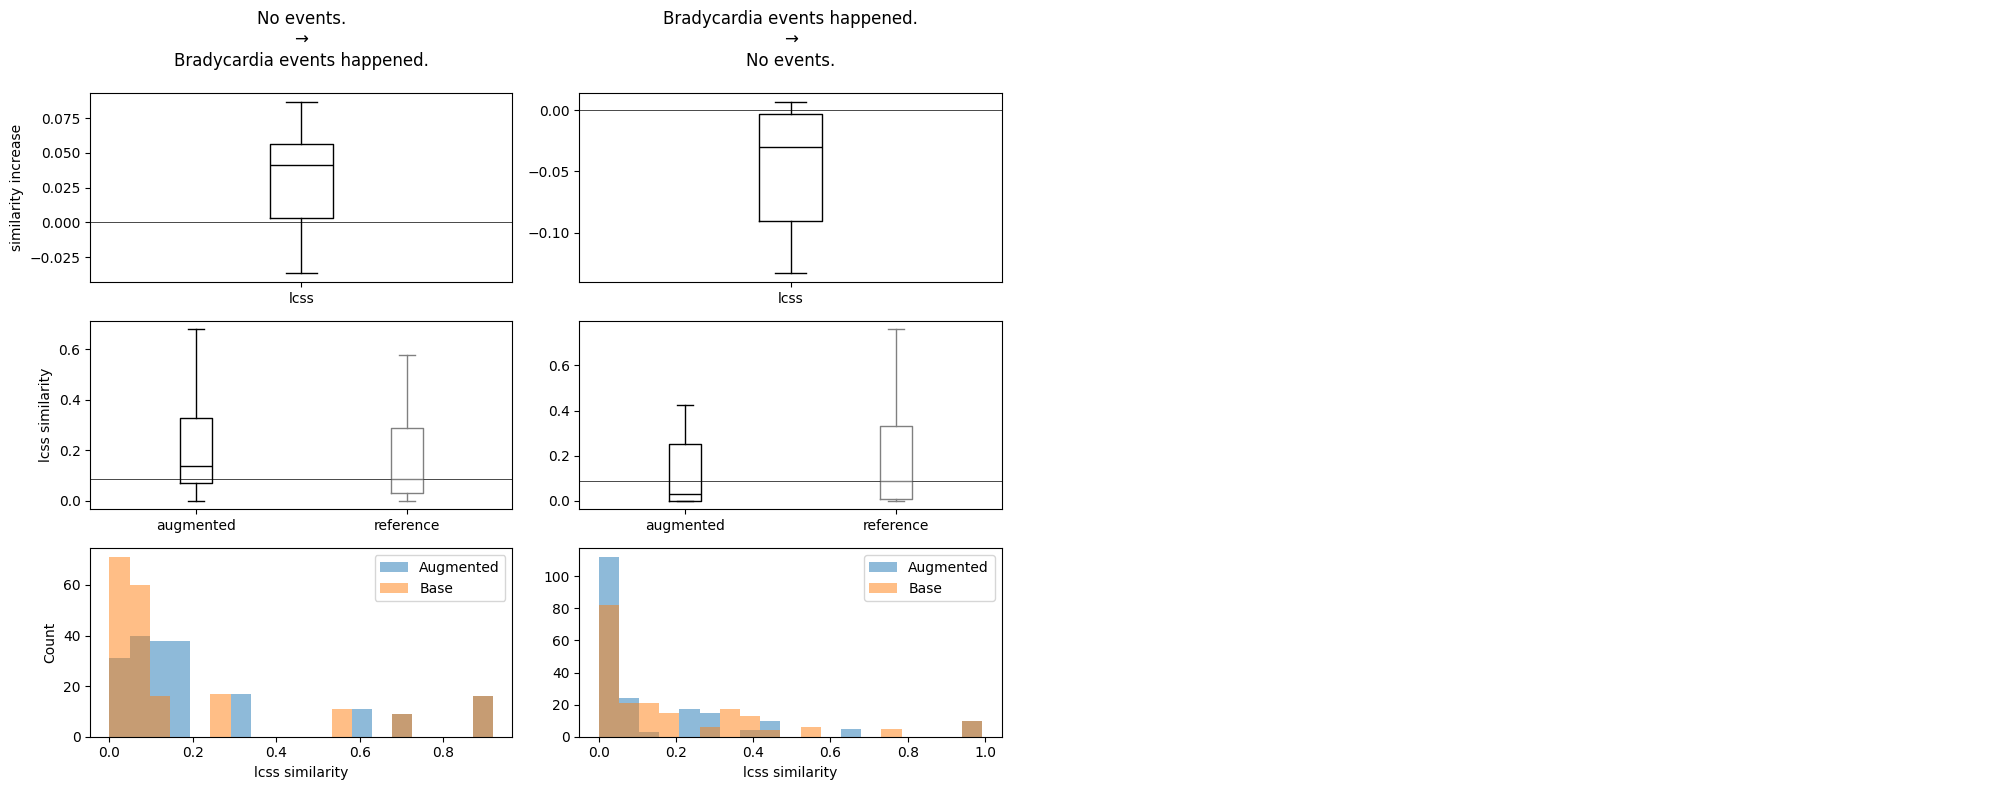

--------------------------------------------------------------------------------


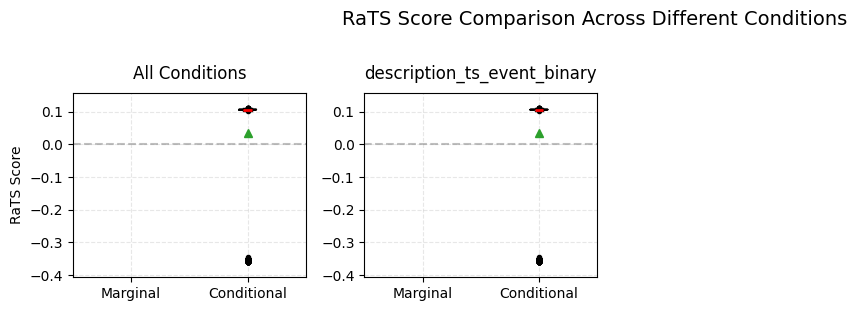

In [17]:
w = 0.5
with open('run/eval.py', 'r') as file:
    exec(file.read())
with open('run/eng_eval.py', 'r') as file:
    exec(file.read())


In [18]:
summarize_scores(df_all)

metric      DTW distance decrease ↓ LCSS similarity increase ↑       RaTS ↑
final_score            -1.05 (3.35)               -0.01 (0.06)  0.04 (0.17)

In [19]:
summarize_scores(df_all, mean_sd = False)

metric      DTW distance decrease ↓ LCSS similarity increase ↑  \
final_score     -0.27 [-4.43, 1.24]         0.00 [-0.04, 0.04]   

metric                  RaTS ↑  
final_score  0.11 [0.11, 0.11]

In [21]:
df_rats_condi[df_rats_condi['score']<0]

aug_type                         attr                     src_level  \
0    conditional  description_ts_event_binary  Bradycardia events happened.   
1    conditional  description_ts_event_binary  Bradycardia events happened.   
2    conditional  description_ts_event_binary  Bradycardia events happened.   
3    conditional  description_ts_event_binary  Bradycardia events happened.   
4    conditional  description_ts_event_binary  Bradycardia events happened.   
..           ...                          ...                           ...   
356  conditional  description_ts_event_binary  Bradycardia events happened.   
357  conditional  description_ts_event_binary  Bradycardia events happened.   
358  conditional  description_ts_event_binary  Bradycardia events happened.   
359  conditional  description_ts_event_binary  Bradycardia events happened.   
360  conditional  description_ts_event_binary  Bradycardia events happened.   

      tgt_level metric     score  
0    No events.   RaTS -0.357685  
1    No events.   RaTS -0.356424  
2    No events.   RaTS -0.354472  
3    No events.   RaTS -0.357402  
4    No events.   RaTS -0.350090  
..          ...    ...       ...  
356  No events.   RaTS -0.353480  
357  No events.   RaTS -0.354863  
358  No events.   RaTS -0.357750  
359  No events.   RaTS -0.356423  
360  No events.   RaTS -0.356509  

[361 rows x 6 columns]